In [ ]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

from importlib import reload

In [2]:
import datajoint_utils as du

INFO - 2021-01-22 18:20:56,070 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-22 18:20:56,072 - settings - Setting database.user to celiib
INFO - 2021-01-22 18:20:56,073 - settings - Setting database.password to newceliipass
INFO - 2021-01-22 18:20:56,087 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-22 18:20:56,088 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-22 18:20:56,100 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-22 18:20:56,369 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-22 18:20:56,401 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-22 18:20:56,402 - settings - Setting database.user to celiib
INFO - 2021-01-22 18:20:56,403 - settings - Setting database.password to newceliipass
INFO - 2021-01-22 18:20:56,405 - settings - Setting enable_python_native_blobs to True


Sleeping 150 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-22 18:20:56,693 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 7312


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135272175377,0,0.25,30.00,0,0,1,=BLOB=,49415,116541,0,0,0,0,1,2,12,7,229143.0638048371,137221.47244126443,14154.946,383.987,372.832,797.911,797.911,63,0.0002749374078966561,5.25,229143.064,12,0.0002749374076624898,5.25,16377051401.623138,150203641.9721635,71470.85811670739,71470.8580558351,1364754283.4685948,118.5987
864691135781479503,0,0.25,30.00,1,0,1,=BLOB=,49896,99336,0,0,0,0,1,5,17,5,226672.13053857177,75504.12284558205,10157.276,382.387,377.228,625.586,625.586,41,0.00018087799281977992,2.411764705882353,226672.131,17,0.00018087799245157315,2.412,8161926611.552537,118414501.81582816,36007.63178146269,36007.631708163266,480113330.0913257,161.4672
864691135269778085,0,0.25,30.00,0,0,1,=BLOB=,54886,137249,0,0,0,0,1,1,9,9,259616.22842272613,259616.22842272613,31382.993,375.898,337.387,532.281,497.674,126,0.000485331755897931,14.0,259616.228,9,0.0004853317566881836,14.0,21692088970.324295,130208319.59808476,83554.44150048913,83554.44163653858,2410232107.8138103,121.7504
864691135570922063,0,0.25,30.00,0,0,1,=BLOB=,12729,25588,0,0,0,0,1,1,12,12,191912.0093402579,191912.0093402579,15818.515,78.247,78.247,131.13,131.13,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.5336
864691135859328688,0,0.25,30.00,1,0,1,=BLOB=,15508,31041,0,0,0,0,1,1,1,1,28636.37432297883,28636.37432297883,28636.374,80.103,80.103,80.103,80.103,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8523
864691136194314572,0,0.25,30.00,3,0,1,=BLOB=,647489,1307673,0,1,1,0,1,4,374,353,10706481.448002968,9487379.255472999,20318.0,94.205,94.205,285.059,283.45,278,2.596557994800935e-05,0.7433155080213903,4311491.99,140,6.447883949333279e-05,1.986,44147630707.66158,65070788.770668186,4123.449045521509,10239.52515974907,315340219.34043986,2343.706
864691136004721098,0,0.25,30.00,1,0,1,=BLOB=,104080,224182,0,0,0,0,1,6,26,11,1002176.4388136197,448367.4893572848,29443.614,265.921,247.11,418.725

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

#     key_source = minnie.Decomposition() & minnie.MultiSomaProofread2.proj()
    classified_table = minnie.BaylorManualCellType() & 'nucleus_version=3'
    key_source = (minnie.Decomposition()  & classified_table.proj())
    key_source
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [11]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table).delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

INFO - 2021-01-22 18:27:11,450 - autopopulate - Found 209 keys to populate
INFO - 2021-01-22 18:27:11,458 - connection - Transaction started
INFO - 2021-01-22 18:27:11,460 - autopopulate - Populating: {'segment_id': 864691135272175377, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('30.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135272175377-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135272175377 = 2.547065496444702 ------


----- Working on Neuron 864691135781479503-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135781479503 = 2.6180083751678467 ------


----- Working on Neuron 864691135269778085-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135269778085 = 2.5905776023864746 ------


----- Working on Neuron 864691135570922063-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135570922063 = 1.3828473091125488 ------


----- Working on Neuron 8646911358

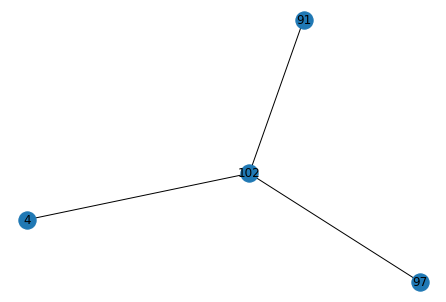

match_branches = [[4, 102], [91, 97]]
edges_to_delete (resolve crossover) = [[4, 91], [4, 97], [91, 102], [97, 102]]
edges_to_create (resolve crossover) = [[4, 102], [91, 97]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 196 because skeletal distance was 561.4215647002089 and threshold was 2500
skip_nodes = [196]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [141 114]: curr_angle = 44.47
  Edge: [114 102]: curr_angle = 28.06
  Edge: [102  91]: curr_angle = 98.47
  Edge: [91 93]: curr_angle = 76.17
  Edge: [ 93 131]: curr_angle = 70.83
  Edge: [131 137]: curr_angle = 87.72
  Edge: [137 132]: curr_angle = 26.32
  Edge: [132 133]: curr_angle = 103.64
  Edge: [133 143]: curr_angle = 33.03
  Edge: [143 191]: curr_angle = 21.91

Total time for doubling_back = 0.6251051425933838
There were 3 edges that passed doubling back threshold of 80
Winning edge [132 133] had a doubling back of 103.64151490177704
***inside resolve crossover!!!!****
coordinate_branches = [128, 132, 133]
128 = red
132 = aqua
133 = purple
Angle between 128 and 132 = 127.03 
Angle between 128 and 133 = 30.58 
Angle between 132 and 133 = 76.07 
Final Matches = [[128, 133]]
matched_branches_revised = [[128, 133]]
Original graph


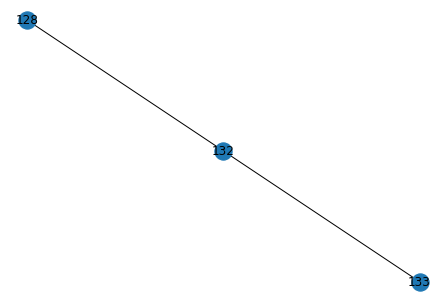

match_branches = [[128, 133]]
edges_to_delete (resolve crossover) = [[128, 132], [132, 133]]
edges_to_create (resolve crossover) = [[128, 133]]
edges_to_delete (cut_limb_network) = [array([128, 132]), array([132, 133])]
edges_to_create = [[128, 133]]
Number of connected components = 2
Comp 0 = {0, 25, 27, 34, 36, 45, 47, 49, 58, 60, 61, 67, 69, 74, 84, 87, 89, 90, 92, 95, 96, 100, 101, 103, 105, 106, 107, 113, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 130, 133, 134, 136, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 175, 176, 177, 178, 179, 180, 182, 183, 184, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 2

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([  0,  25,  27,  34,  36,  45,  47,  49,  58,  60,  61,  67,  69,
        74,  84,  87,  89,  90,  92,  95,  96, 100, 101, 103, 105, 106,
       107, 113, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127,
       128, 130, 133, 134, 136, 138, 139, 140, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173,
       175, 176, 177, 178, 179, 180, 182, 183, 184, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 199, 202, 203, 204, 205, 207,
       208, 209, 210, 211, 212, 214, 215, 216, 217, 219, 220, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

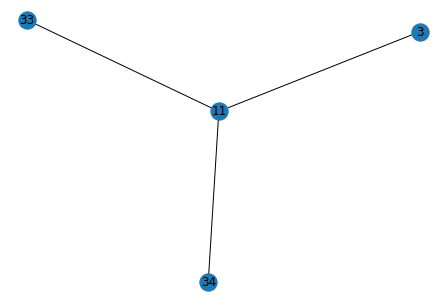

match_branches = []
edges_to_delete (resolve crossover) = [[3, 11], [3, 33], [3, 34], [11, 33], [11, 34], [33, 34]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [0 5]: curr_angle = 29.5
  Edge: [ 5 11]: curr_angle = 43.4
  Edge: [11  3]: curr_angle = 131.09
  Edge: [3 1]: curr_angle = 46.01

Total time for doubling_back = 0.6306359767913818
There were 1 edges that passed doubling back threshold of 80
Winning edge [11  3] had a doubling back of 131.08626567799584
***inside resolve crossover!!!!****
coordinate_branches = [3, 11, 33, 34]
3 = red
11 = aqua
33 = purple
34 = green
Angle between 3 and 11 = 117.49 
Angle between 3 and 33 = 57.28 
Angle between 3 and 34 = 70.01 
Angle between 11 and 33 = 18.05 
Angle between 11 and 34 = 65.29 
Angle between 33 and 34 = 99.19 
Final Matches = [[11, 33]]
matched_branches_revised = [[11, 33]]
Original graph


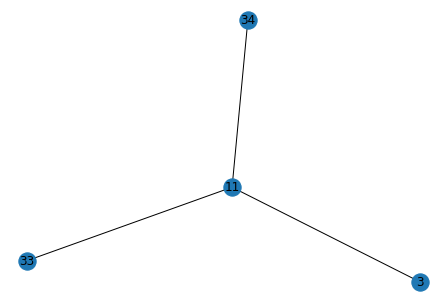

match_branches = [[11, 33]]
edges_to_delete (resolve crossover) = [[3, 11], [3, 33], [3, 34], [11, 34], [33, 34]]
edges_to_create (resolve crossover) = [[11, 33]]
edges_to_delete (cut_limb_network) = [array([ 3, 11]), array([ 3, 33]), array([ 3, 34]), array([11, 34]), array([33, 34])]
edges_to_create = [[11, 33]]
Number of connected components = 4
Comp 0 = {1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
Comp 1 = {0, 33, 4, 5, 11, 12, 19, 20}
Comp 2 = {34}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [array([ 3, 11]), array([ 3, 33]), array([ 3, 34]), array([11, 34]), array([33, 34])]
curr_limb_copy.created_edges = [[11, 33]]
After get best cut: cut_edges = [array([ 3, 11]), array([ 3, 33]), array([ 3, 34]), array([11, 34]), array([33, 34])], added_edges = [[11, 33]]
total_soma_paths_to_cut = []


suggested_cut_points = [[544712.6566506  812743.95048239 972638.3176896 ]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([ 1,  2,  3,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31]), array([ 0, 33,  4,  5, 11, 12, 19, 20]), array([34]), array([32])]


 ------ Total time for Splitting 864691135660534512 = 38.08877611160278 ------


----- Working on Neuron 864691136194086102-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691136194086102 = 4.7103002071380615 ------


----- Working on Neuron 864691135181813250-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [5]


 -------- Working on limb 5------------
Starting

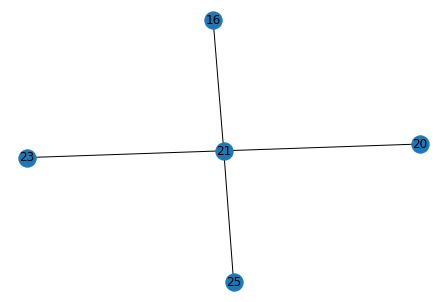

match_branches = [[21, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 21], [16, 23], [16, 25], [20, 21], [20, 23], [20, 25], [21, 25], [23, 25]]
edges_to_create (resolve crossover) = [[21, 23]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [17 18]: curr_angle = 49.28
  Edge: [18 19]: curr_angle = 46.75
  Edge: [19 21]: curr_angle = 92.81
  Edge: [21 20]: curr_angle = 106.32

Total time for doubling_back = 0.10954666137695312
There were 2 edges that passed doubling back threshold of 80
Winning edge [21 20] had a doubling back of 106.31602386446431
***inside resolve crossover!!!!****
coordinate_branches = [16, 20, 21, 23, 25]
16 = red
20 = aqua
21 = purple
23 = green
Angle between 16 and 20 = 117.3 
Angle between 16 and 21 = 105.8 
Angle between 16 and 23 = 89.5 
Angle between 16 and 25 = 53.25 
Angle between 20 and 21 = 99.43 
Angle between 20 and 23 = 80.15 
Angle between 20 and 25 = 38.35 
Angle between 21 and 23 = 17.32 
Angle between 21 and 25 = 43.47 
Angle between 23 and 25 = 131.49 
Final Matches = [[21, 23]]
matched_branches_revised = [[21, 23]]
Original graph


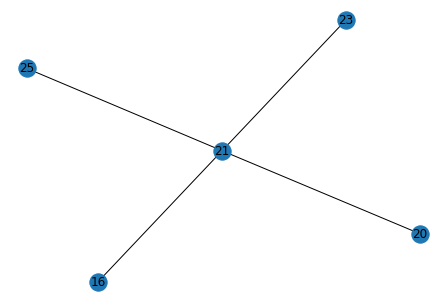

match_branches = [[21, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 21], [16, 23], [16, 25], [20, 21], [20, 23], [20, 25], [21, 25], [23, 25]]
edges_to_create (resolve crossover) = [[21, 23]]
edges_to_delete (cut_limb_network) = [array([16, 20]), array([16, 21]), array([16, 23]), array([16, 25]), array([20, 21]), array([20, 23]), array([20, 25]), array([21, 25]), array([23, 25])]
edges_to_create = [[21, 23]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 10, 15, 17, 18, 19, 21, 22, 23}
Comp 1 = {8, 9, 11, 12, 13, 14, 16}
Comp 2 = {20}
Comp 3 = {25}
Comp 4 = {24}
curr_limb_copy.deleted_edges = [array([16, 20]), array([16, 21]), array([16, 23]), array([16, 25]), array([20, 21]), array([20, 23]), array([20, 25]), array([21, 25]), array([23, 25])]
curr_limb_copy.created_edges = [[21, 23]]
After get best cut: cut_edges = [array([16, 20]), array([16, 21]), array([16, 23]), array([16, 25]), array([20, 21]), array([20, 23]), array([20, 25]), array([21, 25]),

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5: [array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 15, 17, 18, 19, 21, 22, 23]), array([ 8,  9, 11, 12, 13, 14, 16]), array([20]), array([25]), array([24])]


 ------ Total time for Splitting 864691135181813250 = 44.70606851577759 ------


----- Working on Neuron 864691135511328708-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135511328708 = 18.336117267608643 ------


----- Working on Neuron 864691136105735811-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691136105735811 = 2.626006841659546 ------


--

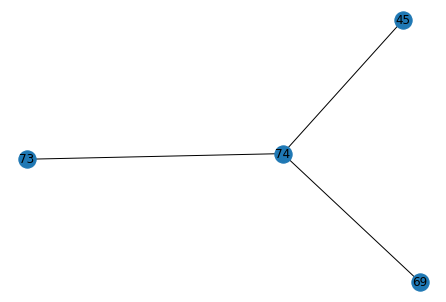

match_branches = [[45, 74]]
edges_to_delete (resolve crossover) = [[45, 69], [45, 73], [69, 73], [69, 74], [73, 74]]
edges_to_create (resolve crossover) = [[45, 74]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 513173.22058594 1024516.75851556  774757.46184576] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [68, 85, 90, 92, 93]
68 = red
85 = aqua
90 = purple
92 = green
Angle between 68 and 85 = 159.73 
Angle between 68 and 90 = 34.06 
Angle between 68 and 92 = 16.17 
Angle between 68 and 93 = 10.28 
Angle between 85 and 90 = 21.45 
Angle between 85 and 92 = 29.1 
Angle between 85 and 93 = 18.07 
Angle between 90 and 92 = 148.47 
Angle between 90 and 93 = 154.84 
Angle between 92 and 93 = 168.94 
Final Matches = [[68, 90], [68, 92], [68, 93], [85, 90], [85, 92], [85, 93]]
matched_branches_revised = [[68, 93], [85, 90]]
Original graph


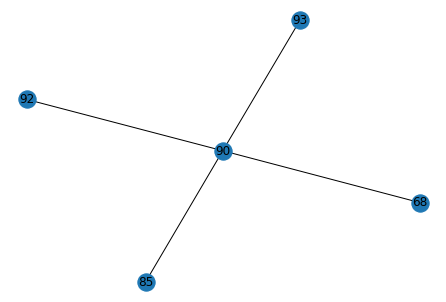

match_branches = [[68, 93], [85, 90]]
edges_to_delete (resolve crossover) = [[68, 85], [68, 90], [68, 92], [85, 92], [85, 93], [90, 92], [90, 93], [92, 93]]
edges_to_create (resolve crossover) = [[68, 93], [85, 90]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 524279.41018007 1018145.95337572  740698.11729956] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [98, 106, 113, 114]
98 = red
106 = aqua
113 = purple
114 = green
Angle between 98 and 106 = 167.88 
Angle between 98 and 113 = 28.5 
Angle between 98 and 114 = 20.89 
Angle between 106 and 113 = 17.1 
Angle between 106 and 114 = 12.39 
Angle between 113 and 114 = 169.69 
Final Matches = [[98, 113], [98, 114], [106, 113], [106, 114]]
matched_branches_revised = [[106, 114], [98, 113]]
Original graph


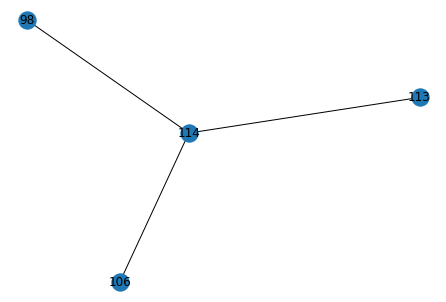

match_branches = [[106, 114], [98, 113]]
edges_to_delete (resolve crossover) = [[98, 106], [98, 114], [106, 113], [113, 114]]
edges_to_create (resolve crossover) = [[106, 114], [98, 113]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [526434.68240358 998879.36688432 814227.00560442] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [66, 118, 119, 120]
66 = red
118 = aqua
119 = purple
120 = green
Angle between 66 and 118 = 26.37 
Angle between 66 and 119 = 72.65 
Angle between 66 and 120 = 66.5 
Angle between 118 and 119 = 100.91 
Angle between 118 and 120 = 117.83 
Angle between 119 and 120 = 154.73 
Final Matches = [[66, 118]]
matched_branches_revised = [[66, 118]]
Original graph


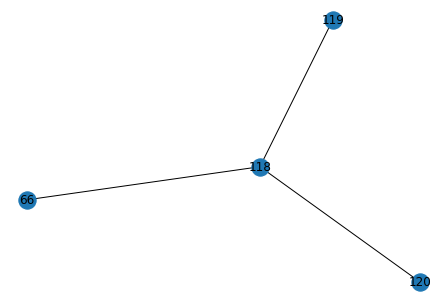

match_branches = [[66, 118]]
edges_to_delete (resolve crossover) = [[66, 119], [66, 120], [118, 119], [118, 120], [119, 120]]
edges_to_create (resolve crossover) = [[66, 118]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 534109.75494237 1002514.86100025  721534.57176321] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [55, 129, 137, 142]
55 = red
129 = aqua
137 = purple
142 = green
Angle between 55 and 129 = 110.35 
Angle between 55 and 137 = 75.22 
Angle between 55 and 142 = 39.66 
Angle between 129 and 137 = 6.53 
Angle between 129 and 142 = 107.09 
Angle between 137 and 142 = 68.39 
Final Matches = [[129, 137]]
matched_branches_revised = [[129, 137]]
Original graph


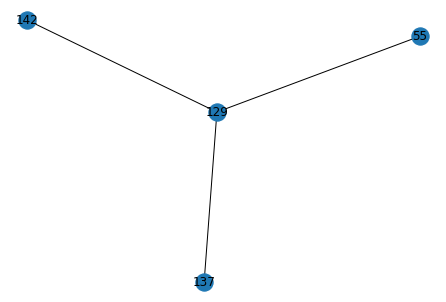

match_branches = [[129, 137]]
edges_to_delete (resolve crossover) = [[55, 129], [55, 137], [55, 142], [129, 142], [137, 142]]
edges_to_create (resolve crossover) = [[129, 137]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 535318.89484141 1001870.48847491  699581.76234332] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [122, 133, 137, 150, 151]
122 = red
133 = aqua
137 = purple
150 = green
Angle between 122 and 133 = 105.09 
Angle between 122 and 137 = 164.82 
Angle between 122 and 150 = 14.8 
Angle between 122 and 151 = 22.96 
Angle between 133 and 137 = 94.45 
Angle between 133 and 150 = 88.42 
Angle between 133 and 151 = 52.14 
Angle between 137 and 150 = 5.65 
Angle between 137 and 151 = 35.87 
Angle between 150 and 151 = 142.7 
Final Matches = [[122, 150], [122, 151], [137, 150]]
matched_branches_revised = [[137, 150], [122, 151]]
Original 

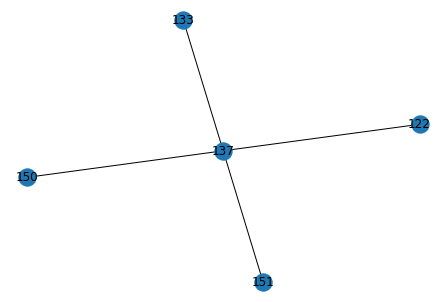

match_branches = [[137, 150], [122, 151]]
edges_to_delete (resolve crossover) = [[122, 133], [122, 137], [122, 150], [133, 137], [133, 150], [133, 151], [137, 151], [150, 151]]
edges_to_create (resolve crossover) = [[137, 150], [122, 151]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 548627.51249548 1020150.13398642  755801.2724068 ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [92, 160, 184, 186]
92 = red
160 = aqua
184 = purple
186 = green
Angle between 92 and 160 = 132.91 
Angle between 92 and 184 = 44.14 
Angle between 92 and 186 = 65.62 
Angle between 160 and 184 = 84.96 
Angle between 160 and 186 = 30.79 
Angle between 184 and 186 = 70.64 
Final Matches = [[160, 186]]
matched_branches_revised = [[160, 186]]
Original graph


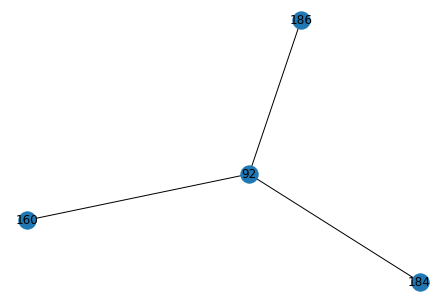

match_branches = [[160, 186]]
edges_to_delete (resolve crossover) = [[92, 160], [92, 184], [92, 186], [160, 184], [184, 186]]
edges_to_create (resolve crossover) = [[160, 186]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 552356.71703469 1017147.87505982  774201.72265611] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [191, 193, 196, 202, 203]
191 = red
193 = aqua
196 = purple
202 = green
Angle between 191 and 193 = 83.54 
Angle between 191 and 196 = 92.48 
Angle between 191 and 202 = 78.01 
Angle between 191 and 203 = 61.69 
Angle between 193 and 196 = 4.01 
Angle between 193 and 202 = 23.39 
Angle between 193 and 203 = 36.7 
Angle between 196 and 202 = 159.28 
Angle between 196 and 203 = 147.21 
Angle between 202 and 203 = 150.25 
Final Matches = [[193, 196], [193, 202]]
matched_branches_revised = [[193, 196]]
Original graph


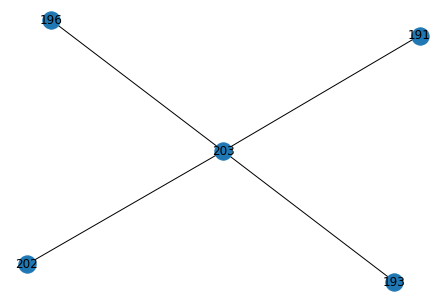

match_branches = [[193, 196]]
edges_to_delete (resolve crossover) = [[191, 193], [191, 196], [191, 202], [191, 203], [193, 202], [193, 203], [196, 202], [196, 203], [202, 203]]
edges_to_create (resolve crossover) = [[193, 196]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 554082.53801261 1017446.17469367  771051.69521834] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [203, 207, 211, 215]
203 = red
207 = aqua
211 = purple
215 = green
Angle between 203 and 207 = 98.31 
Angle between 203 and 211 = 3.29 
Angle between 203 and 215 = 13.0 
Angle between 207 and 211 = 78.68 
Angle between 207 and 215 = 94.63 
Angle between 211 and 215 = 163.83 
Final Matches = [[203, 211], [203, 215]]
matched_branches_revised = [[203, 211]]
Original graph


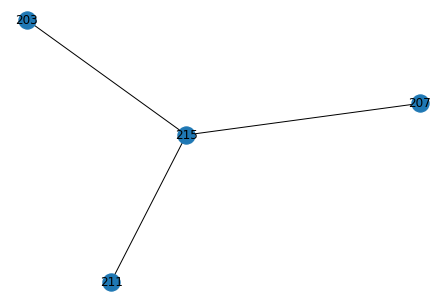

match_branches = [[203, 211]]
edges_to_delete (resolve crossover) = [[203, 207], [203, 215], [207, 211], [207, 215], [211, 215]]
edges_to_create (resolve crossover) = [[203, 211]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 556501.36051871 1021578.99291881  767216.03912519] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [186, 217, 232, 239]
186 = red
217 = aqua
232 = purple
239 = green
Angle between 186 and 217 = 31.79 
Angle between 186 and 232 = 83.4 
Angle between 186 and 239 = 121.33 
Angle between 217 and 232 = 72.46 
Angle between 217 and 239 = 39.78 
Angle between 232 and 239 = 91.85 
Final Matches = [[186, 217]]
matched_branches_revised = [[186, 217]]
Original graph


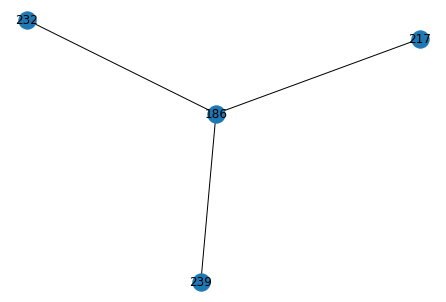

match_branches = [[186, 217]]
edges_to_delete (resolve crossover) = [[186, 232], [186, 239], [217, 232], [217, 239], [232, 239]]
edges_to_create (resolve crossover) = [[186, 217]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 558549.18421102 1001582.87718736  802965.31659721] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [208, 230, 240, 247]
208 = red
230 = aqua
240 = purple
247 = green
Angle between 208 and 230 = 11.41 
Angle between 208 and 240 = 154.77 
Angle between 208 and 247 = 14.14 
Angle between 230 and 240 = 36.6 
Angle between 230 and 247 = 154.5 
Angle between 240 and 247 = 12.01 
Final Matches = [[208, 230], [208, 247], [240, 247]]
matched_branches_revised = [[208, 230], [240, 247]]
Original graph


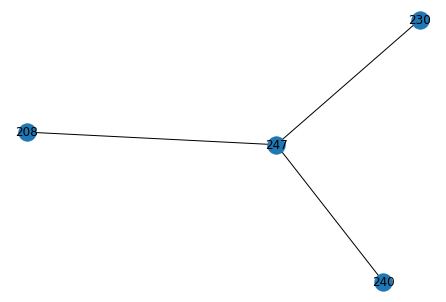

match_branches = [[208, 230], [240, 247]]
edges_to_delete (resolve crossover) = [[208, 240], [208, 247], [230, 240], [230, 247]]
edges_to_create (resolve crossover) = [[208, 230], [240, 247]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 558742.7530962  1001999.77265425  808306.15723812] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [128, 226, 240, 248]
128 = red
226 = aqua
240 = purple
248 = green
Angle between 128 and 226 = 123.97 
Angle between 128 and 240 = 64.55 
Angle between 128 and 248 = 28.25 
Angle between 226 and 240 = 10.63 
Angle between 226 and 248 = 83.13 
Angle between 240 and 248 = 89.61 
Final Matches = [[128, 248], [226, 240]]
matched_branches_revised = [[226, 240], [128, 248]]
Original graph


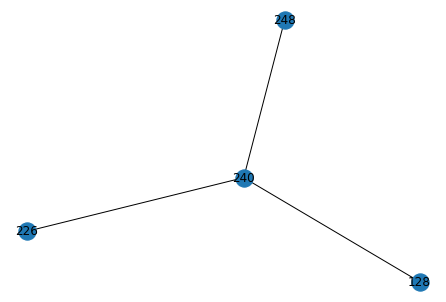

match_branches = [[226, 240], [128, 248]]
edges_to_delete (resolve crossover) = [[128, 226], [128, 240], [226, 248], [240, 248]]
edges_to_create (resolve crossover) = [[226, 240], [128, 248]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 558957.60527407 1002447.90586318  783062.51723033] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [190, 213, 251, 252]
190 = red
213 = aqua
251 = purple
252 = green
Angle between 190 and 213 = 90.07 
Angle between 190 and 251 = 28.78 
Angle between 190 and 252 = 85.09 
Angle between 213 and 251 = 67.01 
Angle between 213 and 252 = 32.4 
Angle between 251 and 252 = 123.61 
Final Matches = [[190, 251], [213, 252]]
matched_branches_revised = [[190, 251], [213, 252]]
Original graph


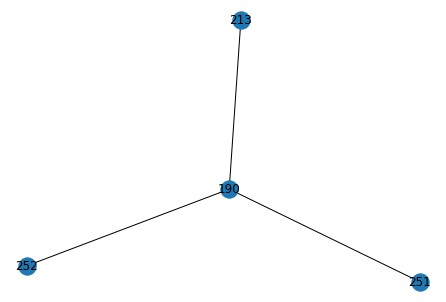

match_branches = [[190, 251], [213, 252]]
edges_to_delete (resolve crossover) = [[190, 213], [190, 252], [213, 251], [251, 252]]
edges_to_create (resolve crossover) = [[190, 251], [213, 252]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [570108.3035233  995114.98736421 780489.54267744] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [259, 273, 284, 285]
259 = red
273 = aqua
284 = purple
285 = green
Angle between 259 and 273 = 135.94 
Angle between 259 and 284 = 126.8 
Angle between 259 and 285 = 37.65 
Angle between 273 and 284 = 83.12 
Angle between 273 and 285 = 8.76 
Angle between 284 and 285 = 90.85 
Final Matches = [[273, 285]]
matched_branches_revised = [[273, 285]]
Original graph


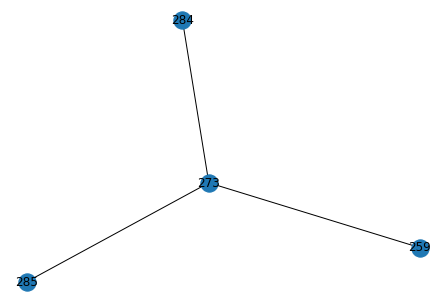

match_branches = [[273, 285]]
edges_to_delete (resolve crossover) = [[259, 273], [259, 284], [259, 285], [273, 284], [284, 285]]
edges_to_create (resolve crossover) = [[273, 285]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [571242.3758598  996222.76501641 780946.99714239] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [247, 284, 288, 289, 290]
247 = red
284 = aqua
288 = purple
289 = green
Angle between 247 and 284 = 120.72 
Angle between 247 and 288 = 106.43 
Angle between 247 and 289 = 36.12 
Angle between 247 and 290 = 80.5 
Angle between 284 and 288 = 51.32 
Angle between 284 and 289 = 23.39 
Angle between 284 and 290 = 37.95 
Angle between 288 and 289 = 106.34 
Angle between 288 and 290 = 119.82 
Angle between 289 and 290 = 129.84 
Final Matches = [[284, 289]]
matched_branches_revised = [[284, 289]]
Original graph


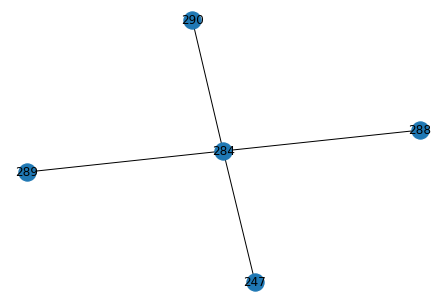

match_branches = [[284, 289]]
edges_to_delete (resolve crossover) = [[247, 284], [247, 288], [247, 289], [247, 290], [284, 288], [284, 290], [288, 289], [288, 290], [289, 290]]
edges_to_create (resolve crossover) = [[284, 289]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 192 because skeletal distance was 957.0313651464614 and threshold was 2500
skip_nodes = [192]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [189 190]: curr_angle = 71.81
  Edge: [190 251]: curr_angle = 19.42
  Edge: [251 273]: curr_angle = 47.71
  Edge: [273 284]: curr_angle = 71.7
  Edge: [284 247]: curr_angle = 132.38
  Edge: [247 240]: curr_angle = 9.33
  Edge: [240 128]: curr_angle = 37.41
  Edge: [128 118]: curr_angle = 32.91
  Edge: [118 119]: curr_angle = 110.78
  Edge: [119 178]: curr_angle = 166.64
  Edge: [178 149]: curr_angle = 22.89
  Edge: [149 148]: curr_angle = 70.08
  Edge: [148 143]: curr_angle = 134.4
  Edge: [143  74]: curr_angle = 46.13
  Edge: [74 73]: curr_angle = 148.32
  Edge: [73 89]: curr_angle = 20.29
  Edge: [89 99]: curr_angle = 29.49
  Edge: [ 99 110]: curr_angle = 27.91
  Edge: [110 129]: curr_angle = 21.54
  Edge: [129 137]: curr_angle = 18.55
  Edge: [137 122]: curr_angle = 168.38
  Edge: [122 114]: curr_angle = 20.81
  Edge: [114 106]: curr_angle = 16.35
  Edge: [106  90]: curr_angle = 24.42
  Edge: [90 92]: curr_angle = 125.82
  Edge: [ 92 186]: curr_angle = 94.85
  Edge: [186 232

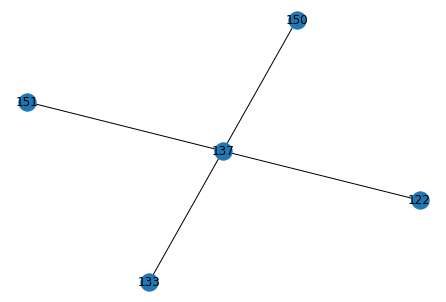

match_branches = [[122, 150], [137, 151]]
edges_to_delete (resolve crossover) = [[122, 133], [122, 137], [122, 151], [133, 137], [133, 150], [133, 151], [137, 150], [150, 151]]
edges_to_create (resolve crossover) = [[122, 150], [137, 151]]
edges_to_delete (cut_limb_network) = [array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
edges_to_create = [[122, 150], [137, 151]]
Number of connected components = 11
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 21, 33, 34, 35, 36, 37, 39, 40, 45, 46, 48, 51, 55, 58, 66, 67, 69, 72, 73, 74, 78, 79, 81, 83, 84, 87, 89, 96, 99, 100, 107, 110, 118, 119, 120, 126, 128, 129, 137, 139, 140, 142, 143, 148, 149, 151, 162, 170, 171, 172, 173, 175, 178, 187, 189, 190, 206, 208, 212, 213, 214, 226, 230, 240, 243, 247, 248, 251, 252, 255, 259, 260, 261, 262, 266, 268, 270, 273, 274, 278, 284, 285, 288, 289, 290, 293, 295, 296, 302, 304, 305, 306, 307, 308, 

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 11
Total number of graphs at the end of the split AFTER DIRECTIONAL = 11
No valid path so moving onto the next connection


---- working on disconnecting 189 and 195
---- This disconnects S0_0 from S0_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 11
Total number of graphs at the end of the split AFTER DIRECTIONAL = 11
No valid path so moving onto the next connection


---- working on disconnecting 192 and 195
---- This disconnects S0_1 from S0_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 11
Total number of graphs at the end of the split AFTER DIRECTIONAL = 11
Shortest path = [192, 191, 193, 234, 238, 235, 224, 201, 199, 195]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 1

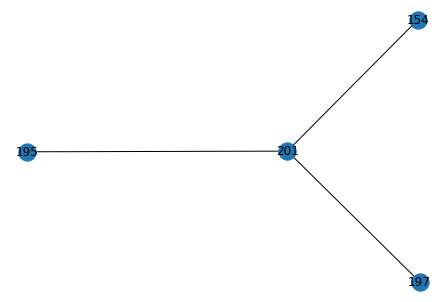

match_branches = [[154, 201]]
edges_to_delete (resolve crossover) = [[154, 195], [154, 197], [195, 197], [195, 201], [197, 201]]
edges_to_create (resolve crossover) = [[154, 201]]
curr_limb.deleted_edges 5 =[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 552356.71703469 1017147.87505982  774201.72265611] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
***inside resolve crossover!!!!****
coordinate_branches = [191, 193, 196, 202, 203]
191 = red
193 = aqua
196 = purple
202 = green
Angle between 191 and 193 = 83.54 
Angle between 191 and 196 = 92.48 
Angle between 191 and 202 = 78.01 
Angle between 191 and 203 = 61.69 
Angle between 193 and

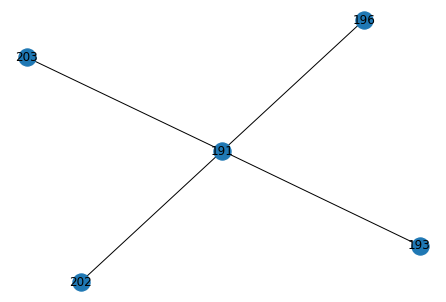

match_branches = [[193, 196]]
edges_to_delete (resolve crossover) = [[191, 193], [191, 196], [191, 202], [191, 203], [193, 202], [193, 203], [196, 202], [196, 203], [202, 203]]
edges_to_create (resolve crossover) = [[193, 196]]
curr_limb.deleted_edges 5 =[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 556990.18715289 1002576.34683625  756129.94997401] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
***inside resolve crossover!!!!****
coordinate_branches = [223, 229, 234, 235, 241]
223 = red
229 = aqua
234 = purple
235 = green
Angle between 223 and 229 = 20.25 
Angle between 223 and 234 = 137.21 
Angle between 223 and 235 = 138.37 
Angle 

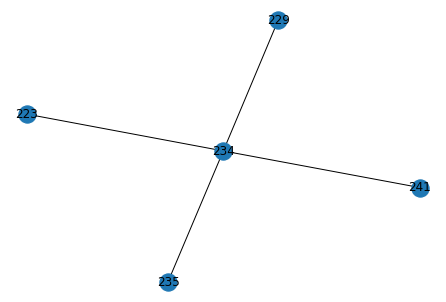

match_branches = [[235, 241], [223, 229]]
edges_to_delete (resolve crossover) = [[223, 234], [223, 235], [223, 241], [229, 234], [229, 235], [229, 241], [234, 235], [234, 241]]
edges_to_create (resolve crossover) = [[235, 241], [223, 229]]
curr_limb.deleted_edges 5 =[array([122, 133]), array([122, 137]), array([122, 151]), array([133, 137]), array([133, 150]), array([133, 151]), array([137, 150]), array([150, 151])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 192 because skeletal distance was 957.0313651464614 and threshold was 2500
Skipping endnode 195 because skeletal distance was 1566.9496645305544 and threshold was 2500
skip_nodes = [192, 195]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [191 193]: curr_angle = 84.82
  Edge: [193 234]: curr_angle = 57.15
  Edge: [234 235]: curr_angle = 126.43
  Edge: [235 224]: curr_angle = 71.59
  Edge: [224 201]: curr_angle = 42.32

Total time for doubling_back = 0.280134916305542
There were 2 edges that passed doubling back threshold of 80
Winning edge [234 235] had a doubling back of 126.43451912965226
***inside resolve crossover!!!!****
coordinate_branches = [223, 229, 234, 235, 241]
223 = red
229 = aqua
234 = purple
235 = green
Angle between 223 and 229 = 37.4 
Angle between 223 and 234 = 136.47 
Angle between 223 and 235 = 131.92 
Angle between 223 and 241 = 28.0 
Angle between 229 and 234 = 27.72 
Angle between 229 and 235 = 80.31 
Angle between 229 and 241 = 115.37 
Angle between 234 and 235 = 88.53 
Angle between 234 and 241 = 61.71 
Angle between 235 and 241 = 37.06 
Final Matches = [[223, 241], [229, 234]]
matched_branches_revised = [[229, 234], [223, 241]]
Original graph


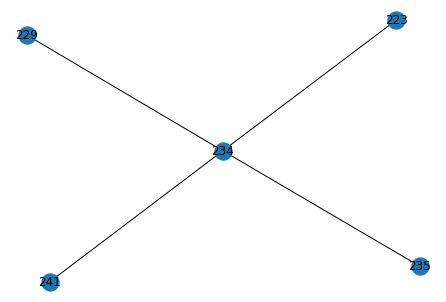

match_branches = [[229, 234], [223, 241]]
edges_to_delete (resolve crossover) = [[223, 229], [223, 234], [223, 235], [229, 235], [229, 241], [234, 235], [234, 241], [235, 241]]
edges_to_create (resolve crossover) = [[229, 234], [223, 241]]
Rejecting creating edge [223, 241] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([223, 229]), array([223, 234]), array([223, 235]), array([229, 235]), array([229, 241]), array([234, 235]), array([234, 241]), array([235, 241])]
edges_to_create = [[229, 234]]
Number of connected components = 16
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 21, 33, 34, 35, 36, 37, 39, 40, 45, 46, 48, 51, 55, 58, 66, 67, 69, 72, 73, 74, 78, 79, 81, 83, 84, 87, 89, 96, 99, 100, 107, 110, 118, 119, 120, 126, 128, 129, 137, 139, 140, 142, 143, 148, 149, 151, 162, 170, 171, 172, 173, 175, 178, 187, 189, 190, 206, 208, 212, 213, 214, 226, 230, 240, 243, 247, 248, 251, 252, 255, 259, 260, 261, 262, 266, 268, 270, 273, 2

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 16
Total number of graphs at the end of the split AFTER DIRECTIONAL = 16
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 16: [array([  1,   2,   3,   4,   5,   6,   7,   8,  14,  15,  16,  17,  21,
        33,  34,  35,  36,  37,  39,  40,  45,  46,  48,  51,  55,  58,
        66,  67,  69,  72,  73,  74,  78,  79,  81,  83,  84,  87,  89,
        96,  99, 100, 107, 110, 118, 119, 120, 126, 128, 129, 137, 139,
       140, 142, 143, 148, 149, 151, 162, 170, 171, 172, 173, 175, 178,
       187, 189, 190, 206, 208, 212, 213, 214, 226, 230, 240, 243, 247,
       248, 251, 252, 255, 259, 260, 261, 262, 266, 268, 270, 273, 274,
       278, 284, 285, 288, 289, 290, 293, 295, 296, 302, 304, 305, 306,
       307, 308, 323, 324, 325, 328, 331, 343, 377, 379]), array([  0,   9,  10,  11,  12,  13,  18,  19,  22,  23,  24,  25,  2

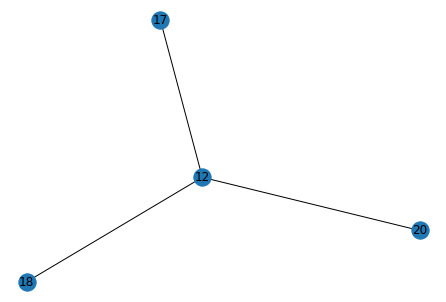

match_branches = [[12, 20], [17, 18]]
edges_to_delete (resolve crossover) = [[12, 17], [12, 18], [17, 20], [18, 20]]
edges_to_create (resolve crossover) = [[12, 20], [17, 18]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 9 because skeletal distance was 1915.9957613009938 and threshold was 2500
skip_nodes = [9]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [5 4]: curr_angle = 72.74
  Edge: [ 4 12]: curr_angle = 66.57
  Edge: [12 17]: curr_angle = 97.61
  Edge: [17 13]: curr_angle = 53.79

Total time for doubling_back = 0.14888739585876465
There were 1 edges that passed doubling back threshold of 80
Winning edge [12 17] had a doubling back of 97.60754581003431
***inside resolve crossover!!!!****
coordinate_branches = [12, 17, 18, 20]
12 = red
17 = aqua
18 = purple
20 = green
Angle between 12 and 17 = 83.58 
Angle between 12 and 18 = 71.7 
Angle between 12 and 20 = 19.53 
Angle between 17 and 18 = 41.47 
Angle between 17 and 20 = 87.7 
Angle between 18 and 20 = 104.65 
Final Matches = [[12, 20]]
matched_branches_revised = [[12, 20]]
Original graph


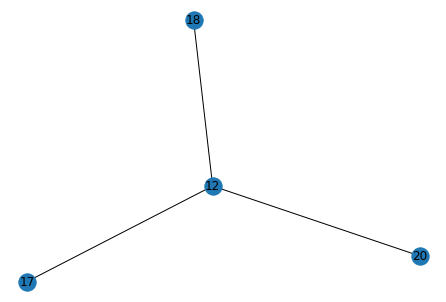

match_branches = [[12, 20]]
edges_to_delete (resolve crossover) = [[12, 17], [12, 18], [17, 18], [17, 20], [18, 20]]
edges_to_create (resolve crossover) = [[12, 20]]
edges_to_delete (cut_limb_network) = [array([12, 17]), array([12, 18]), array([17, 18]), array([17, 20]), array([18, 20])]
edges_to_create = [[12, 20]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 20}
Comp 1 = {13, 17, 19, 22, 23}
Comp 2 = {16, 18, 21}
curr_limb_copy.deleted_edges = [array([12, 17]), array([12, 18]), array([17, 18]), array([17, 20]), array([18, 20])]
curr_limb_copy.created_edges = [[12, 20]]
After get best cut: cut_edges = [array([12, 17]), array([12, 18]), array([17, 18]), array([17, 20]), array([18, 20])], added_edges = [[12, 20]]
total_soma_paths_to_cut = []


suggested_cut_points = [[633677. 403263. 710202.]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 20]), array([13, 17, 19, 22, 23]), array([16, 18, 21])]


 ------ Total time for Splitting 864691135937157636 = 13.52200698852539 ------


----- Working on Neuron 864691135064984132-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135064984132 = 22.586076974868774 ------


----- Working on Neuron 864691136084051564-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [2]


 -------- Working on limb 2------------
Starting combinations to process = [[0 1]]


---- working on disconn

  Edge: [0 3]: curr_angle = 38.03
  Edge: [ 3 11]: curr_angle = 52.14
  Edge: [11 14]: curr_angle = 43.77
  Edge: [14  9]: curr_angle = 130.04
  Edge: [9 1]: curr_angle = 46.42

Total time for doubling_back = 0.436631441116333
There were 1 edges that passed doubling back threshold of 80
Winning edge [14  9] had a doubling back of 130.0421812960287
***inside resolve crossover!!!!****
coordinate_branches = [9, 14, 17]
9 = red
14 = aqua
17 = purple
Angle between 9 and 14 = 116.69 
Angle between 9 and 17 = 20.0 
Angle between 14 and 17 = 65.16 
Final Matches = [[9, 17]]
matched_branches_revised = [[9, 17]]
Original graph


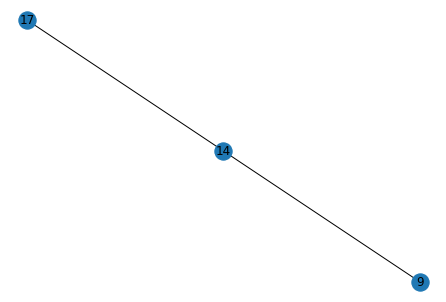

match_branches = [[9, 17]]
edges_to_delete (resolve crossover) = [[9, 14], [14, 17]]
edges_to_create (resolve crossover) = [[9, 17]]
edges_to_delete (cut_limb_network) = [array([ 9, 14]), array([14, 17])]
edges_to_create = [[9, 17]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 5, 6, 7, 10, 11, 14, 15}
Comp 1 = {1, 8, 9, 12, 13, 16, 17, 18}
curr_limb_copy.deleted_edges = [array([ 9, 14]), array([14, 17])]
curr_limb_copy.created_edges = [[9, 17]]
After get best cut: cut_edges = [array([ 9, 14]), array([14, 17])], added_edges = [[9, 17]]
total_soma_paths_to_cut = []


suggested_cut_points = [[684851. 494554. 702509.]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  4,  5,  6,  7, 10, 11, 14, 15]), array([ 1,  8,  9, 12, 13, 16, 17, 18])]


 ------ Total time for Splitting 864691136084051564 = 53.380213499069214 ------


----- Working on Neuron 864691135462249373-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135462249373 = 34.77858757972717 ------


----- Working on Neuron 864691135692750527-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135692750527 = 24.649348974227905 ------


----- Working on Neuron 864691135510506363-------
Decomp

  Edge: [18 19]: curr_angle = 40.84
  Edge: [19 24]: curr_angle = 39.71
  Edge: [24 40]: curr_angle = 86.67
  Edge: [40 41]: curr_angle = 7.92
  Edge: [41 43]: curr_angle = 7.62
  Edge: [43 45]: curr_angle = 33.77
  Edge: [45 44]: curr_angle = 14.85
  Edge: [44 47]: curr_angle = 12.58
  Edge: [47 48]: curr_angle = 21.6
  Edge: [48 51]: curr_angle = 1.74
  Edge: [51 49]: curr_angle = 16.94

Total time for doubling_back = 0.31224608421325684
There were 1 edges that passed doubling back threshold of 80
Winning edge [24 40] had a doubling back of 86.6669069703919
***inside resolve crossover!!!!****
coordinate_branches = [24, 37, 40]
24 = red
37 = aqua
40 = purple
Angle between 24 and 37 = 81.79 
Angle between 24 and 40 = 58.49 
Angle between 37 and 40 = 40.8 
Final Matches = []
matched_branches_revised = []
Original graph


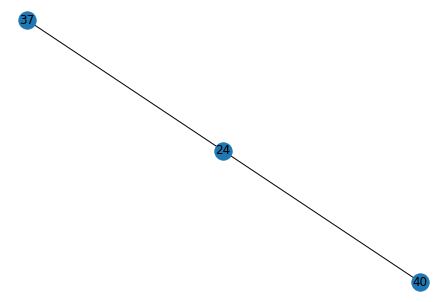

match_branches = []
edges_to_delete (resolve crossover) = [[24, 37], [24, 40], [37, 40]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([24, 37]), array([24, 40]), array([37, 40])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {7, 8, 41, 40, 43, 44, 13, 45, 47, 48, 49, 50, 51, 52, 46, 42, 56, 57, 29}
Comp 1 = {0, 1, 3, 4, 18, 19, 24}
Comp 2 = {2, 5, 6, 9, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 53, 54, 55, 58}
curr_limb_copy.deleted_edges = [array([24, 37]), array([24, 40]), array([37, 40])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([24, 37]), array([24, 40]), array([37, 40])], added_edges = []
total_soma_paths_to_cut = []


suggested_cut_points = [[594733. 741429. 935522.]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 7,  8, 41, 40, 43, 44, 13, 45, 47, 48, 49, 50, 51, 52, 46, 42, 56,
       57, 29]), array([ 0,  1,  3,  4, 18, 19, 24]), array([ 2,  5,  6,  9, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 25, 26,
       27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 53, 54, 55, 58])]


 ------ Total time for Splitting 864691135490881732 = 166.37746453285217 ------


----- Working on Neuron 864691135490141124-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135490141124 = 142.9502773284912 ------


----- Working on Neuron 864691135155515492-------
Decompressing Neuron in minimal output mode...please wait
mu

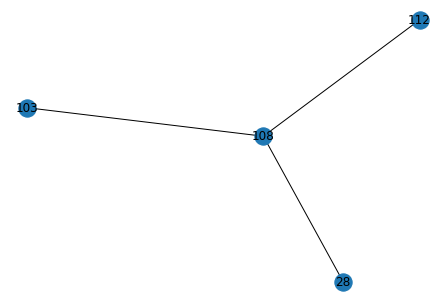

match_branches = [[108, 112]]
edges_to_delete (resolve crossover) = [[28, 103], [28, 108], [28, 112], [103, 108], [103, 112]]
edges_to_create (resolve crossover) = [[108, 112]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 701418.17434609  873388.86588025 1008327.54027596] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [39, 72, 135, 136]
39 = red
72 = aqua
135 = purple
136 = green
Angle between 39 and 72 = 107.31 
Angle between 39 and 135 = 52.42 
Angle between 39 and 136 = 77.68 
Angle between 72 and 135 = 110.63 
Angle between 72 and 136 = 61.49 
Angle between 135 and 136 = 112.29 
Final Matches = []
matched_branches_revised = []
Original graph


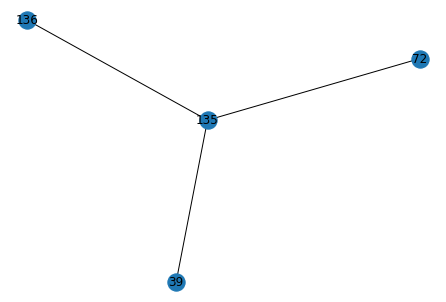

match_branches = []
edges_to_delete (resolve crossover) = [[39, 72], [39, 135], [39, 136], [72, 135], [72, 136], [135, 136]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [705713.89667819 867951.17526966 998755.244756  ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [76, 135, 143, 155]
76 = red
135 = aqua
143 = purple
155 = green
Angle between 76 and 135 = 165.26 
Angle between 76 and 143 = 78.44 
Angle between 76 and 155 = 39.68 
Angle between 135 and 143 = 85.53 
Angle between 135 and 155 = 24.94 
Angle between 143 and 155 = 82.38 
Final Matches = [[135, 155]]
matched_branches_revised = [[135, 155]]
Original graph


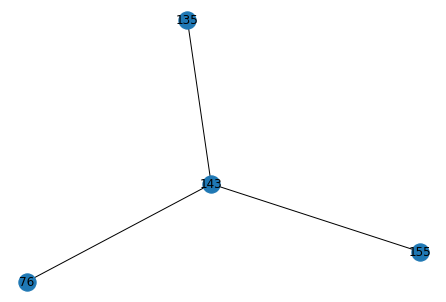

match_branches = [[135, 155]]
edges_to_delete (resolve crossover) = [[76, 135], [76, 143], [76, 155], [135, 143], [143, 155]]
edges_to_create (resolve crossover) = [[135, 155]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [713665.5 834962.5 999439.5] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [172, 173, 174, 179]
172 = red
173 = aqua
174 = purple
179 = green
Angle between 172 and 173 = 83.77 
Angle between 172 and 174 = 127.15 
Angle between 172 and 179 = 112.51 
Angle between 173 and 174 = 104.79 
Angle between 173 and 179 = 19.15 
Angle between 174 and 179 = 79.4 
Final Matches = [[173, 179]]
matched_branches_revised = [[173, 179]]
Original graph


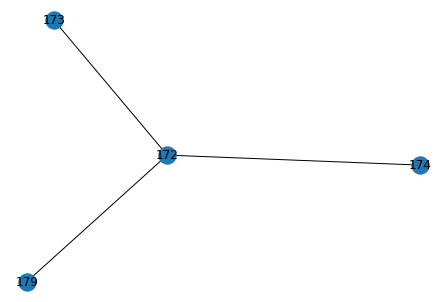

match_branches = [[173, 179]]
edges_to_delete (resolve crossover) = [[172, 173], [172, 174], [172, 179], [173, 174], [174, 179]]
edges_to_create (resolve crossover) = [[173, 179]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 177 because skeletal distance was 386.21999492952557 and threshold was 2500
Skipping endnode 179 because skeletal distance was 515.8620269224837 and threshold was 2500
skip_nodes = [177, 179]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [164 147]: curr_angle = 53.5
  Edge: [147 142]: curr_angle = 19.25
  Edge: [142 143]: curr_angle = 35.88
  Edge: [143 135]: curr_angle = 72.31
  Edge: [135 136]: curr_angle = 126.33
  Edge: [136 140]: curr_angle = 121.15
  Edge: [140 108]: curr_angle = 83.52
  Edge: [108 112]: curr_angle = 13.14
  Edge: [112 116]: curr_angle = 130.97
  Edge: [116 146]: curr_angle = 43.3
  Edge: [146 161]: curr_angle = 37.73
  Edge: [161 172]: curr_angle = 17.63

Total time for doubling_back = 0.5850980281829834
There were 4 edges that passed doubling back threshold of 80
Winning edge [112 116] had a doubling back of 130.97469952466645
***inside resolve crossover!!!!****
coordinate_branches = [106, 112, 116]
106 = red
112 = aqua
116 = purple
Angle between 106 and 112 = 18.95 
Angle between 106 and 116 = 61.59 
Angle between 112 and 116 = 113.49 
Final Matches = [[106, 112]]
matched_branches_revised = [[106, 112]]
Original graph


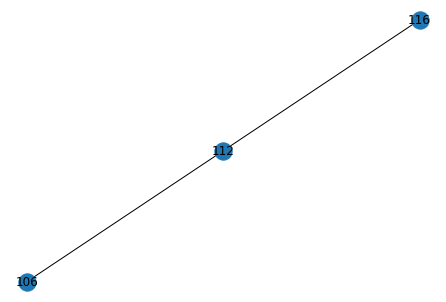

match_branches = [[106, 112]]
edges_to_delete (resolve crossover) = [[106, 116], [112, 116]]
edges_to_create (resolve crossover) = [[106, 112]]
edges_to_delete (cut_limb_network) = [array([106, 116]), array([112, 116])]
edges_to_create = [[106, 112]]
Number of connected components = 5
Comp 0 = {146, 149, 150, 151, 153, 154, 161, 172, 173, 174, 50, 179, 65, 66, 68, 70, 77, 79, 90, 91, 93, 95, 96, 97, 98, 100, 104, 105, 116, 124}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 69, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 94, 99, 101, 102, 103, 106, 107, 108, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 155, 156, 157,

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5: [array([146, 149, 150, 151, 153, 154, 161, 172, 173, 174,  50, 179,  65,
        66,  68,  70,  77,  79,  90,  91,  93,  95,  96,  97,  98, 100,
       104, 105, 116, 124]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  67,
        69,  71,  72,  73,  74,  75,  76,  78,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  92,  94,  99, 101, 102, 103, 106, 107,
       108, 110, 111, 112, 113

  Edge: [2 1]: curr_angle = 102.17
  Edge: [1 4]: curr_angle = 86.86

Total time for doubling_back = 0.05250239372253418
There were 2 edges that passed doubling back threshold of 80
Winning edge [2 1] had a doubling back of 102.17425132503772
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 32.98 
Angle between 0 and 2 = 95.64 
Angle between 1 and 2 = 110.25 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


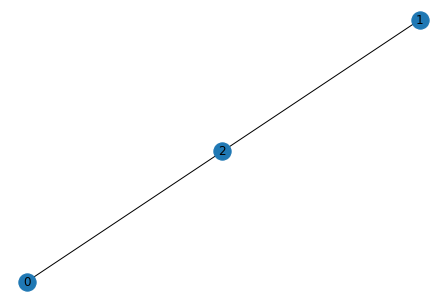

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {0, 1, 3, 4}
Comp 1 = {2}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []


suggested_cut_points = [[789246.96501185 446011.89345351 724892.23886899]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 1, 3, 4]), array([2])]


 -------- Working on limb 1------------
Starting combinations to process = [[0 2]
 [0 4]
 [2 4]]


---- working on disconnecting 0 and 2
---- This disconnects S0_2 from S0_4  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [0, 2]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [1]
Short segments to combine = [1]


-------- Removing Segments -------------
curr_short_seg_revised = 1
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints

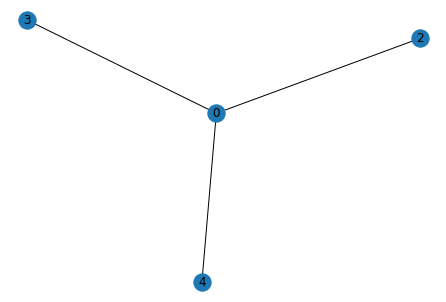

match_branches = [[0, 3]]
edges_to_delete (resolve crossover) = [[0, 2], [0, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create (resolve crossover) = [[0, 3]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 0 because skeletal distance was 2194.5924084367584 and threshold was 2500
Skipping endnode 2 because skeletal distance was 1105.8790822204237 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [0 2]: curr_angle = 129.98

Total time for doubling_back = 0.031200408935546875
There were 1 edges that passed doubling back threshold of 80
Winning edge [0 2] had a doubling back of 129.9769907624802
***inside resolve crossover!!!!****
coordinate_branches = [0, 2, 3, 4]
0 = red
2 = aqua
3 = purple
4 = green
Angle between 0 and 2 = 127.4 
Angle between 0 and 3 = 1.67 
Angle between 0 and 4 = 78.78 
Angle between 2 and 3 = 54.23 
Angle between 2 and 4 = 126.51 
Angle between 3 and 4 = 102.57 
Final Matches = [[0, 3]]
matched_branches_revised = [[0, 3]]
Original graph


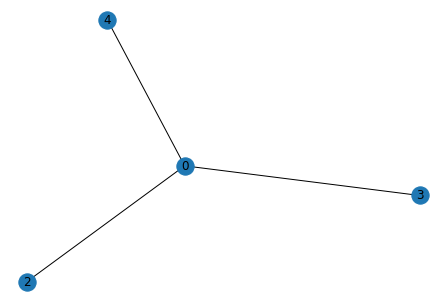

match_branches = [[0, 3]]
edges_to_delete (resolve crossover) = [[0, 2], [0, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create (resolve crossover) = [[0, 3]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([0, 4]), array([2, 3]), array([2, 4]), array([3, 4])]
edges_to_create = [[0, 3]]
Number of connected components = 4
Comp 0 = {4}
Comp 1 = {0, 3}
Comp 2 = {2}
Comp 3 = {1}
curr_limb_copy.deleted_edges = [array([0, 2]), array([0, 4]), array([2, 3]), array([2, 4]), array([3, 4])]
curr_limb_copy.created_edges = [[0, 3]]
After get best cut: cut_edges = [array([0, 2]), array([0, 4]), array([2, 3]), array([2, 4]), array([3, 4])], added_edges = [[0, 3]]
total_soma_paths_to_cut = []


suggested_cut_points = [[795173.72862001 452489.19907667 732823.20290405]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 0 and 4
---- This disconnects S0_2 from S0_3  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 2 and 4
---- This disconnects S0_4 from S0_3  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([4]), array([0, 3]), array([2]), array([1])]


 ------ Total time for Splitting 864691135256140975 = 42.77872586250305 ------


-----

  Edge: [36 41]: curr_angle = 16.49
  Edge: [41 63]: curr_angle = 44.93
  Edge: [63 92]: curr_angle = 21.29
  Edge: [92 78]: curr_angle = 17.98
  Edge: [78 79]: curr_angle = 93.89
  Edge: [79 66]: curr_angle = 26.61
  Edge: [66 59]: curr_angle = 58.68
  Edge: [59 51]: curr_angle = 52.32
  Edge: [51 38]: curr_angle = 75.96
  Edge: [38 37]: curr_angle = 10.93

Total time for doubling_back = 0.7270553112030029
There were 1 edges that passed doubling back threshold of 80
Winning edge [78 79] had a doubling back of 93.89389702492494
***inside resolve crossover!!!!****
coordinate_branches = [67, 78, 79]
67 = red
78 = aqua
79 = purple
Angle between 67 and 78 = 94.46 
Angle between 67 and 79 = 23.23 
Angle between 78 and 79 = 77.05 
Final Matches = [[67, 79]]
matched_branches_revised = [[67, 79]]
Original graph


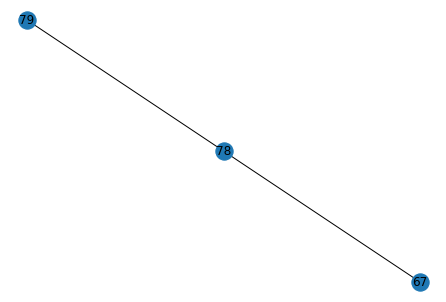

match_branches = [[67, 79]]
edges_to_delete (resolve crossover) = [[67, 78], [78, 79]]
edges_to_create (resolve crossover) = [[67, 79]]
edges_to_delete (cut_limb_network) = [array([67, 78]), array([78, 79])]
edges_to_create = [[67, 79]]
Number of connected components = 2
Comp 0 = {34, 36, 39, 41, 78, 25, 90, 91, 92, 62, 63}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
curr_limb_copy.deleted_edges = [array([67, 78]), array([78, 79])]
curr_limb_copy.created_edges = [[67, 79]]
After get best cut: cut_edges = [array([67, 78]), array([78, 79])], added_edges = [[67, 79]]
total_soma_paths_to_cu

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([34, 36, 39, 41, 78, 25, 90, 91, 92, 62, 63]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,
        27,  28,  29,  30,  31,  32,  33,  35,  37,  38,  40,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118])]


 ------ Total time for Splitting 86469113573010

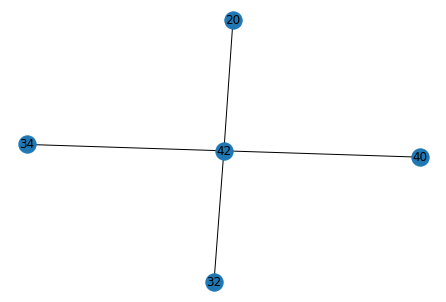

match_branches = [[20, 40], [32, 42]]
edges_to_delete (resolve crossover) = [[20, 32], [20, 34], [20, 42], [32, 34], [32, 40], [34, 40], [34, 42], [40, 42]]
edges_to_create (resolve crossover) = [[20, 40], [32, 42]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 27 because skeletal distance was 1682.669263192502 and threshold was 2500
Skipping endnode 32 because skeletal distance was 2128.5986349888644 and threshold was 2500
skip_nodes = [27, 32]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [25 47]: curr_angle = 33.35
  Edge: [47 52]: curr_angle = 48.29
  Edge: [52 49]: curr_angle = 97.98
  Edge: [49 42]: curr_angle = 28.33

Total time for doubling_back = 0.1500108242034912
There were 1 edges that passed doubling back threshold of 80
Winning edge [52 49] had a doubling back of 97.98096507854171
***inside resolve crossover!!!!****
coordinate_branches = [49, 52, 57]
49 = red
52 = aqua
57 = purple
Angle between 49 and 52 = 54.03 
Angle between 49 and 57 = 125.53 
Angle between 52 and 57 = 7.0 
Final Matches = [[52, 57]]
matched_branches_revised = [[52, 57]]
Original graph


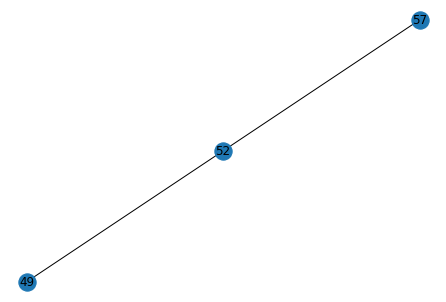

match_branches = [[52, 57]]
edges_to_delete (resolve crossover) = [[49, 52], [49, 57]]
edges_to_create (resolve crossover) = [[52, 57]]
edges_to_delete (cut_limb_network) = [array([49, 52]), array([49, 57])]
edges_to_create = [[52, 57]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 75, 80, 81, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {9, 14, 18, 19, 25, 27, 47, 51, 52, 57, 67, 72, 73, 74, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 2 = {39}
curr_limb_copy.deleted_edges = [array([49, 52]), array([49, 57])]
curr_limb_copy.created_edges = [[52, 57]]
After get best cut: cut_edges = [array([49, 52]), array([49, 57])], added_edges = [[52, 57]]
total_soma_paths_to_cut = []


suggested_cut_points = [[ 827617.24192761 1044910.94907322 1059738.3696

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        15,  16,  17,  20,  21,  22,  23,  24,  26,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,
        46,  48,  49,  50,  53,  54,  55,  56,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  68,  69,  70,  71,  75,  80,  81,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100]), array([ 9, 14, 18, 19, 25, 27, 47, 51, 52, 57, 67, 72, 73, 74, 76, 77, 78,
       79, 82, 83, 84, 85, 86, 87, 88, 89, 90]), array([39])]


 -------- Working on limb 2------------
Starting combinations to process = [[15 20]]


---- working on disconnecting 15 and 20
---- This disconnects S0_0 from 

  Edge: [15 18]: curr_angle = 84.44

Total time for doubling_back = 0.04253578186035156
There were 1 edges that passed doubling back threshold of 80
Winning edge [15 18] had a doubling back of 84.44021069818588
***inside resolve crossover!!!!****
coordinate_branches = [15, 16, 18]
15 = red
16 = aqua
18 = purple
Angle between 15 and 16 = 47.29 
Angle between 15 and 18 = 68.57 
Angle between 16 and 18 = 64.74 
Final Matches = []
matched_branches_revised = []
Original graph


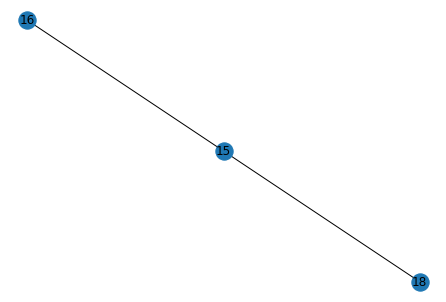

match_branches = []
edges_to_delete (resolve crossover) = [[15, 16], [15, 18], [16, 18]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([15, 16]), array([15, 18]), array([16, 18])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {15}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 23, 24, 25, 26, 27, 28}
Comp 2 = {18, 19, 20, 21, 22}
curr_limb_copy.deleted_edges = [array([15, 16]), array([15, 18]), array([16, 18])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([15, 16]), array([15, 18]), array([16, 18])], added_edges = []
total_soma_paths_to_cut = []


suggested_cut_points = [[ 810506.19017102 1056239.48729578 1050156.28028514]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([15]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       23, 24, 25, 26, 27, 28]), array([18, 19, 20, 21, 22])]


 ------ Total time for Splitting 864691136090910644 = 50.66978645324707 ------


----- Working on Neuron 864691135474740800-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[15 26]]


---- working on disconnecting 15 and 26
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL 

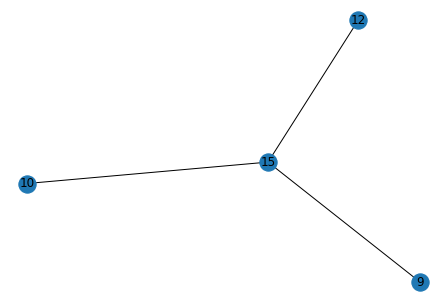

match_branches = [[9, 15]]
edges_to_delete (resolve crossover) = [[9, 10], [9, 12], [10, 12], [10, 15], [12, 15]]
edges_to_create (resolve crossover) = [[9, 15]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [15 10]: curr_angle = 80.1
  Edge: [10  7]: curr_angle = 30.93
  Edge: [ 7 38]: curr_angle = 85.54
  Edge: [38  6]: curr_angle = 92.37
  Edge: [ 6 18]: curr_angle = 101.93
  Edge: [18 21]: curr_angle = 35.86
  Edge: [21 25]: curr_angle = 5.99
  Edge: [25 26]: curr_angle = 11.93

Total time for doubling_back = 0.3758580684661865
There were 4 edges that passed doubling back threshold of 80
Winning edge [ 6 18] had a doubling back of 101.92831674122183
***inside resolve crossover!!!!****
coordinate_branches = [6, 18, 19]
6 = red
18 = aqua
19 = purple
Angle between 6 and 18 = 72.01 
Angle between 6 and 19 = 82.14 
Angle between 18 and 19 = 26.15 
Final Matches = [[18, 19]]
matched_branches_revised = [[18, 19]]
Original graph


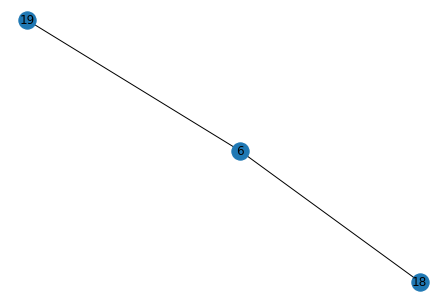

match_branches = [[18, 19]]
edges_to_delete (resolve crossover) = [[6, 18], [6, 19]]
edges_to_create (resolve crossover) = [[18, 19]]
edges_to_delete (cut_limb_network) = [array([ 6, 18]), array([ 6, 19])]
edges_to_create = [[18, 19]]
Number of connected components = 3
Comp 0 = {0, 8, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37}
Comp 1 = {1, 2, 3, 4, 5, 38, 6, 7, 9, 10, 12, 15}
Comp 2 = {14}
curr_limb_copy.deleted_edges = [array([ 6, 18]), array([ 6, 19])]
curr_limb_copy.created_edges = [[18, 19]]
After get best cut: cut_edges = [array([ 6, 18]), array([ 6, 19])], added_edges = [[18, 19]]
total_soma_paths_to_cut = []


suggested_cut_points = [[889827. 405442. 921171.]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  8, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37]), array([ 1,  2,  3,  4,  5, 38,  6,  7,  9, 10, 12, 15]), array([14])]


 ------ Total time for Splitting 864691135474740800 = 51.007521629333496 ------


----- Working on Neuron 864691135581209284-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135581209284 = 32.99978470802307 ------


----- Working on Neuron 864691135278204382-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135

  Edge: [24 32]: curr_angle = 22.13
  Edge: [32 34]: curr_angle = 126.96
  Edge: [34 29]: curr_angle = 129.93
  Edge: [29 28]: curr_angle = 24.72
  Edge: [28 25]: curr_angle = 16.69

Total time for doubling_back = 0.30413389205932617
There were 2 edges that passed doubling back threshold of 80
Winning edge [34 29] had a doubling back of 129.93188858344033
***inside resolve crossover!!!!****
coordinate_branches = [29, 31, 34]
29 = red
31 = aqua
34 = purple
Angle between 29 and 31 = 27.38 
Angle between 29 and 34 = 45.77 
Angle between 31 and 34 = 112.66 
Final Matches = [[29, 31]]
matched_branches_revised = [[29, 31]]
Original graph


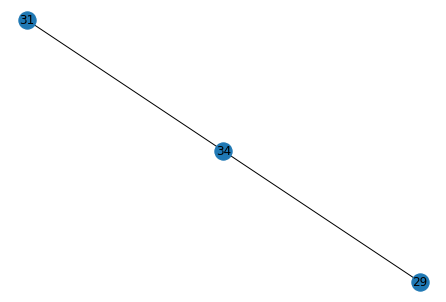

match_branches = [[29, 31]]
edges_to_delete (resolve crossover) = [[29, 34], [31, 34]]
edges_to_create (resolve crossover) = [[29, 31]]
edges_to_delete (cut_limb_network) = [array([29, 34]), array([31, 34])]
edges_to_create = [[29, 31]]
Number of connected components = 2
Comp 0 = {35, 36, 25, 26, 28, 29, 30, 31}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 33, 34}
curr_limb_copy.deleted_edges = [array([29, 34]), array([31, 34])]
curr_limb_copy.created_edges = [[29, 31]]
After get best cut: cut_edges = [array([29, 34]), array([31, 34])], added_edges = [[29, 31]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1001912.64541356  699413.5379198   845208.83561899]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([35, 36, 25, 26, 28, 29, 30, 31]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 33, 34])]


 ------ Total time for Splitting 864691135988299776 = 59.06872630119324 ------


----- Working on Neuron 864691135497677810-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135497677810 = 32.91427803039551 ------


----- Working on Neuron 864691135926332884-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135926332884 = 25.294

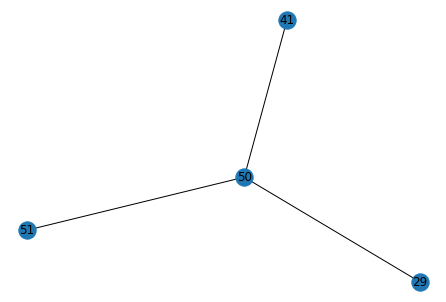

match_branches = [[41, 50], [29, 51]]
edges_to_delete (resolve crossover) = [[29, 41], [29, 50], [41, 51], [50, 51]]
edges_to_create (resolve crossover) = [[41, 50], [29, 51]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 938537.58813265 1043546.25396963 1008143.06923592] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [50, 66, 69, 70]
50 = red
66 = aqua
69 = purple
70 = green
Angle between 50 and 66 = 135.02 
Angle between 50 and 69 = 19.75 
Angle between 50 and 70 = 33.96 
Angle between 66 and 69 = 52.74 
Angle between 66 and 70 = 78.78 
Angle between 69 and 70 = 143.71 
Final Matches = [[50, 69], [50, 70]]
matched_branches_revised = [[50, 69]]
Original graph


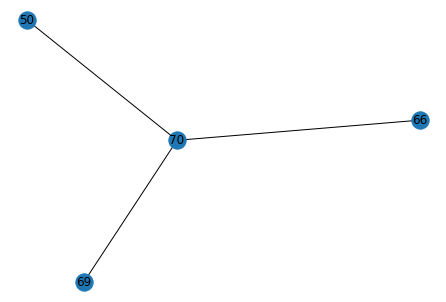

match_branches = [[50, 69]]
edges_to_delete (resolve crossover) = [[50, 66], [50, 70], [66, 69], [66, 70], [69, 70]]
edges_to_create (resolve crossover) = [[50, 69]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 948048.24259943 1045296.20267907 1014960.4834054 ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [72, 83, 86, 87]
72 = red
83 = aqua
86 = purple
87 = green
Angle between 72 and 83 = 122.86 
Angle between 72 and 86 = 21.87 
Angle between 72 and 87 = 13.03 
Angle between 83 and 86 = 44.2 
Angle between 83 and 87 = 50.19 
Angle between 86 and 87 = 152.65 
Final Matches = [[72, 86], [72, 87]]
matched_branches_revised = [[72, 87]]
Original graph


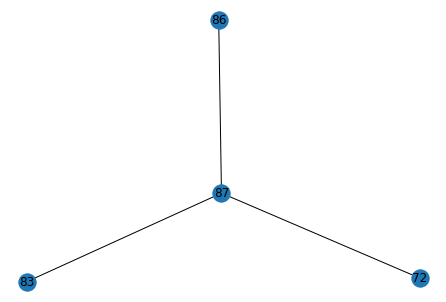

match_branches = [[72, 87]]
edges_to_delete (resolve crossover) = [[72, 83], [72, 86], [83, 86], [83, 87], [86, 87]]
edges_to_create (resolve crossover) = [[72, 87]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 961674.76240878 1028505.04301451 1032641.88317684] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [103, 104, 124, 133, 134]
103 = red
104 = aqua
124 = purple
133 = green
Angle between 103 and 104 = 152.25 
Angle between 103 and 124 = 43.19 
Angle between 103 and 133 = 79.07 
Angle between 103 and 134 = 30.48 
Angle between 104 and 124 = 68.62 
Angle between 104 and 133 = 54.51 
Angle between 104 and 134 = 7.37 
Angle between 124 and 133 = 57.79 
Angle between 124 and 134 = 106.96 
Angle between 133 and 134 = 130.67 
Final Matches = [[103, 134], [104, 134]]
matched_branches_revised = [[104, 134]]
Original graph


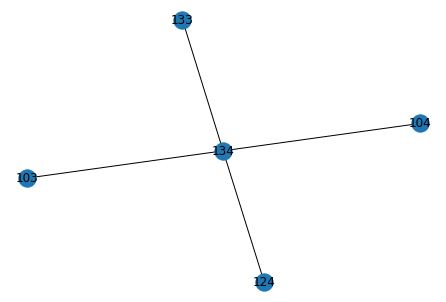

match_branches = [[104, 134]]
edges_to_delete (resolve crossover) = [[103, 104], [103, 124], [103, 133], [103, 134], [104, 124], [104, 133], [124, 133], [124, 134], [133, 134]]
edges_to_create (resolve crossover) = [[104, 134]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 962365.27644945 1037314.20585017  996458.10940031] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [116, 129, 132, 135]
116 = red
129 = aqua
132 = purple
135 = green
Angle between 116 and 129 = 115.54 
Angle between 116 and 132 = 85.64 
Angle between 116 and 135 = 28.94 
Angle between 129 and 132 = 32.86 
Angle between 129 and 135 = 89.43 
Angle between 132 and 135 = 65.61 
Final Matches = [[116, 135], [129, 132]]
matched_branches_revised = [[116, 135], [129, 132]]
Original graph


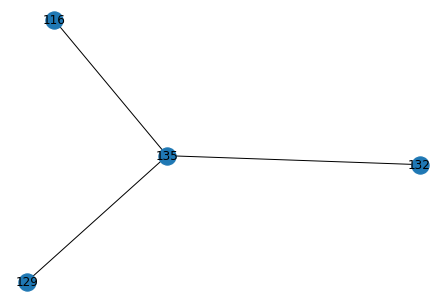

match_branches = [[116, 135], [129, 132]]
edges_to_delete (resolve crossover) = [[116, 129], [116, 132], [129, 135], [132, 135]]
edges_to_create (resolve crossover) = [[116, 135], [129, 132]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 963397.38579857 1038204.5955422  1020201.6559002 ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [87, 96, 117, 136]
87 = red
96 = aqua
117 = purple
136 = green
Angle between 87 and 96 = 155.38 
Angle between 87 and 117 = 143.47 
Angle between 87 and 136 = 19.23 
Angle between 96 and 117 = 141.31 
Angle between 96 and 136 = 25.63 
Angle between 117 and 136 = 17.55 
Final Matches = [[87, 136], [96, 136], [117, 136]]
matched_branches_revised = [[117, 136]]
Original graph


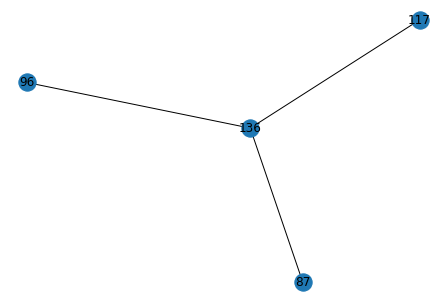

match_branches = [[117, 136]]
edges_to_delete (resolve crossover) = [[87, 96], [87, 117], [87, 136], [96, 117], [96, 136]]
edges_to_create (resolve crossover) = [[117, 136]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 970697.58702643 1032746.26468131  991210.43244894] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [74, 132, 155, 159]
74 = red
132 = aqua
155 = purple
159 = green
Angle between 74 and 132 = 27.73 
Angle between 74 and 155 = 70.24 
Angle between 74 and 159 = 148.78 
Angle between 132 and 155 = 100.47 
Angle between 132 and 159 = 10.59 
Angle between 155 and 159 = 89.86 
Final Matches = [[74, 132], [132, 159]]
matched_branches_revised = [[132, 159]]
Original graph


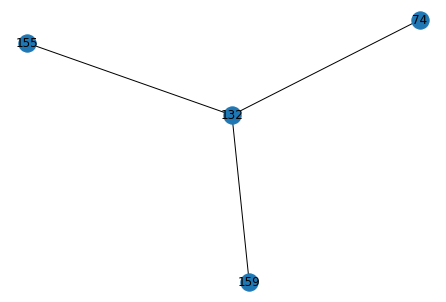

match_branches = [[132, 159]]
edges_to_delete (resolve crossover) = [[74, 132], [74, 155], [74, 159], [132, 155], [155, 159]]
edges_to_create (resolve crossover) = [[132, 159]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 136 because skeletal distance was 2028.745773140398 and threshold was 2500
skip_nodes = [136]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [87 83]: curr_angle = 46.63
  Edge: [83 79]: curr_angle = 28.99
  Edge: [79 70]: curr_angle = 42.62
  Edge: [70 50]: curr_angle = 25.69
  Edge: [50 51]: curr_angle = 137.03
  Edge: [51 81]: curr_angle = 5.8
  Edge: [ 81 108]: curr_angle = 13.92
  Edge: [108 123]: curr_angle = 19.08
  Edge: [123 135]: curr_angle = 161.68
  Edge: [135 132]: curr_angle = 19.14
  Edge: [132 159]: curr_angle = 68.29
  Edge: [159 145]: curr_angle = 108.68
  Edge: [145 146]: curr_angle = 136.34
  Edge: [146 144]: curr_angle = 127.42
  Edge: [144 134]: curr_angle = 23.04
  Edge: [134 124]: curr_angle = 99.52
  Edge: [124 137]: curr_angle = 100.36

Total time for doubling_back = 0.8187172412872314
There were 7 edges that passed doubling back threshold of 80
Winning edge [123 135] had a doubling back of 161.67845444475137
***inside resolve crossover!!!!****
coordinate_branches = [123, 135, 141]
123 = red
135 = aqua
141 = purple
Angle between 123 and 135 = 127.57 
Angle between 123 and 141 = 28.32 
Angle 

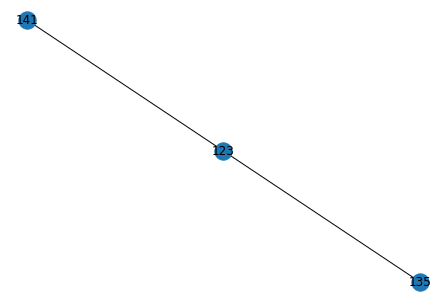

match_branches = [[123, 141]]
edges_to_delete (resolve crossover) = [[123, 135], [135, 141]]
edges_to_create (resolve crossover) = [[123, 141]]
edges_to_delete (cut_limb_network) = [array([123, 135]), array([135, 141])]
edges_to_create = [[123, 141]]
Number of connected components = 8
Comp 0 = {136, 141, 142, 148, 21, 151, 152, 25, 153, 29, 158, 33, 34, 36, 164, 38, 37, 40, 41, 167, 43, 44, 48, 49, 50, 51, 53, 54, 55, 58, 59, 60, 61, 62, 66, 69, 70, 71, 72, 78, 79, 80, 81, 83, 86, 87, 91, 92, 94, 96, 108, 117, 122, 123}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 30, 31, 32, 35, 39, 42, 45, 46, 52, 56, 57, 63, 64, 65, 68, 73, 74, 75, 76, 77, 82, 84, 85, 88, 89, 90, 93, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 124, 126, 127, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 143, 144, 145, 146, 147, 149, 150, 154, 155, 157, 159, 160, 161, 162, 163, 16

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 8
Total number of graphs at the end of the split AFTER DIRECTIONAL = 8
No valid path so moving onto the next connection


---- working on disconnecting 136 and 139
---- This disconnects S0_0 from S0_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 8
Total number of graphs at the end of the split AFTER DIRECTIONAL = 8
No valid path so moving onto the next connection


---- working on disconnecting 136 and 150
---- This disconnects S0_0 from S0_5  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 8
Total number of graphs at the end of the split AFTER DIRECTIONAL = 8
No valid path so moving onto the next connection


---- working on disconnecting 136 and 170
---- This disconnects S0_0 from S0_4  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 8
Total number o

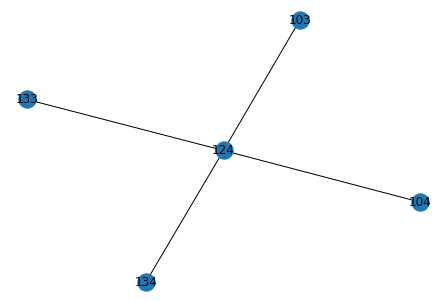

match_branches = [[104, 134]]
edges_to_delete (resolve crossover) = [[103, 104], [103, 124], [103, 133], [103, 134], [104, 124], [104, 133], [124, 133], [124, 134], [133, 134]]
edges_to_create (resolve crossover) = [[104, 134]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 962365.27644945 1037314.20585017  996458.10940031] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141])]
***inside resolve crossover!!!!****
coordinate_branches = [116, 129, 132, 135]
116 = red
129 = aqua
132 = purple
135 = green
Angle between 116 and 129 = 115.54 
Angle between 116 and 132 = 85.63 
Angle between 116 and 135 = 28.94 
Angle between 129 and 132 = 32.86 
Angle between 129 and 135 = 89.43 
Angle between 132 and 135 = 65.62 
Final Matches = [[116, 135], [129, 132]]
matched_branches_revised = [[116, 135], [129, 132]]
Original graph


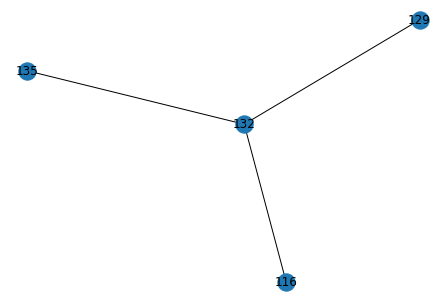

match_branches = [[116, 135], [129, 132]]
edges_to_delete (resolve crossover) = [[116, 129], [116, 132], [129, 135], [132, 135]]
edges_to_create (resolve crossover) = [[116, 135], [129, 132]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 965333.27381148 1051292.00795293 1006652.53134804] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141])]
***inside resolve crossover!!!!****
coordinate_branches = [127, 129, 138, 139, 329]
127 = red
129 = aqua
138 = purple
139 = green
Angle between 127 and 129 = 90.92 
Angle between 127 and 138 = 117.47 
Angle between 127 and 139 = 15.6 
Angle between 127 and 329 = 138.18 
Angle between 129 and 138 = 31.21 
Angle between 129 and 139 = 88.5 
Angle between 129 and 329 = 101.15 
Angle between 138 and 139 = 67.69 
Angle between 138 and 329 = 108.65 
Angle between 139 and 329 = 56.81 
Final Matches = [[127, 13

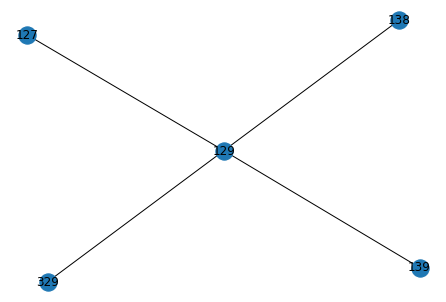

match_branches = [[127, 139], [129, 138]]
edges_to_delete (resolve crossover) = [[127, 129], [127, 138], [127, 329], [129, 139], [129, 329], [138, 139], [138, 329], [139, 329]]
edges_to_create (resolve crossover) = [[127, 139], [129, 138]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 970656.04010678 1032160.33515987  991181.38943557] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141])]
***inside resolve crossover!!!!****
coordinate_branches = [52, 74, 106, 132, 159]
52 = red
74 = aqua
106 = purple
132 = green
Angle between 52 and 74 = 103.34 
Angle between 52 and 106 = 115.91 
Angle between 52 and 132 = 48.1 
Angle between 52 and 159 = 125.48 
Angle between 74 and 106 = 82.95 
Angle between 74 and 132 = 28.88 
Angle between 74 and 159 = 153.0 
Angle between 106 and 132 = 79.79 
Angle between 106 and 159 = 106.49 
Angle between 132 and 1

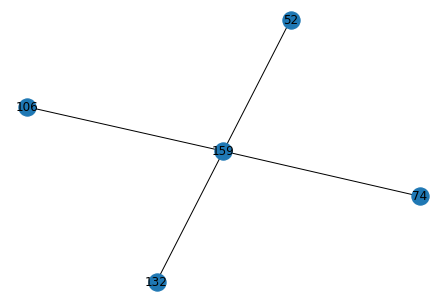

match_branches = [[132, 159]]
edges_to_delete (resolve crossover) = [[52, 74], [52, 106], [52, 132], [52, 159], [74, 106], [74, 132], [74, 159], [106, 132], [106, 159]]
edges_to_create (resolve crossover) = [[132, 159]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [137 124]: curr_angle = 100.36
  Edge: [124 134]: curr_angle = 96.16
  Edge: [134 144]: curr_angle = 39.16
  Edge: [144 146]: curr_angle = 128.99
  Edge: [146 145]: curr_angle = 112.0
  Edge: [145 159]: curr_angle = 108.62
  Edge: [159 132]: curr_angle = 51.3
  Edge: [132 129]: curr_angle = 36.99
  Edge: [129 139]: curr_angle = 94.3

Total time for doubling_back = 0.5113859176635742
There were 6 edges that passed doubling back threshold of 80
Winning edge [144 146] had a doubling back of 128.9903009188488
***inside resolve crossover!!!!****
coordinate_branches = [144, 146, 163]
144 = red
146 = aqua
163 = purple
Angle between 144 and 146 = 139.78 
Angle between 144 and 163 = 32.42 
Angle between 146 and 163 = 61.27 
Final Matches = [[144, 163]]
matched_branches_revised = [[144, 163]]
Original graph


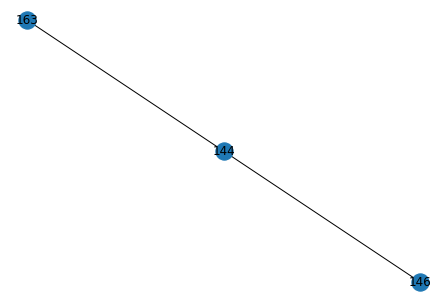

match_branches = [[144, 163]]
edges_to_delete (resolve crossover) = [[144, 146], [146, 163]]
edges_to_create (resolve crossover) = [[144, 163]]
edges_to_delete (cut_limb_network) = [array([144, 146]), array([146, 163])]
edges_to_create = [[144, 163]]
Number of connected components = 10
Comp 0 = {136, 141, 142, 148, 21, 151, 152, 25, 153, 29, 158, 33, 34, 36, 164, 38, 37, 40, 41, 167, 43, 44, 48, 49, 50, 51, 53, 54, 55, 58, 59, 60, 61, 62, 66, 69, 70, 71, 72, 78, 79, 80, 81, 83, 86, 87, 91, 92, 94, 96, 108, 117, 122, 123}
Comp 1 = {42, 52, 65, 74, 85, 88, 89, 93, 95, 97, 100, 102, 105, 106, 110, 111, 114, 115, 116, 120, 121, 126, 127, 129, 130, 132, 135, 138, 139, 140, 145, 146, 149, 150, 154, 159, 160, 172, 173, 174, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 214, 216, 217, 219, 220, 221, 222, 229, 231, 235, 236, 237, 239, 240, 241, 245, 252, 259, 329}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 10
Total number of graphs at the end of the split AFTER DIRECTIONAL = 10
No valid path so moving onto the next connection


---- working on disconnecting 137 and 150
---- This disconnects S0_3 from S0_5  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 10
Total number of graphs at the end of the split AFTER DIRECTIONAL = 10
No valid path so moving onto the next connection


---- working on disconnecting 137 and 170
---- This disconnects S0_3 from S0_4  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 10
Total number of graphs at the end of the split AFTER DIRECTIONAL = 10
Shortest path = [137, 124, 134, 144, 163, 168, 170]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163])]
consider_path_neighbors_for_

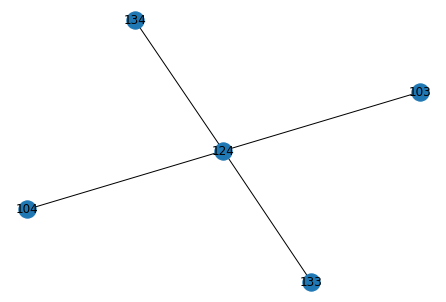

match_branches = [[104, 134]]
edges_to_delete (resolve crossover) = [[103, 104], [103, 124], [103, 133], [103, 134], [104, 124], [104, 133], [124, 133], [124, 134], [133, 134]]
edges_to_create (resolve crossover) = [[104, 134]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 976010.70495065 1026804.79830169 1029999.82572661] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163])]
***inside resolve crossover!!!!****
coordinate_branches = [168, 169, 170, 171]
168 = red
169 = aqua
170 = purple
171 = green
Angle between 168 and 169 = 22.33 
Angle between 168 and 170 = 75.71 
Angle between 168 and 171 = 12.52 
Angle between 169 and 170 = 108.9 
Angle between 169 and 171 = 156.54 
Angle between 170 and 171 = 116.75 
Final Matches = [[168, 169], [168, 171]]
matched_branches_

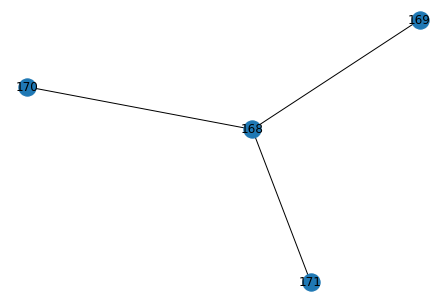

match_branches = [[168, 171]]
edges_to_delete (resolve crossover) = [[168, 169], [168, 170], [169, 170], [169, 171], [170, 171]]
edges_to_create (resolve crossover) = [[168, 171]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 170 because skeletal distance was 1761.73945677221 and threshold was 2500
skip_nodes = [170]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [137 124]: curr_angle = 100.36
  Edge: [124 134]: curr_angle = 96.16
  Edge: [134 144]: curr_angle = 39.16
  Edge: [144 163]: curr_angle = 9.48
  Edge: [163 168]: curr_angle = 27.48

Total time for doubling_back = 0.1826319694519043
There were 2 edges that passed doubling back threshold of 80
Winning edge [137 124] had a doubling back of 100.36494601419317
***inside resolve crossover!!!!****
coordinate_branches = [98, 124, 137]
98 = red
124 = aqua
137 = purple
Angle between 98 and 124 = 54.92 
Angle between 98 and 137 = 47.0 
Angle between 124 and 137 = 86.32 
Final Matches = []
matched_branches_revised = []
Original graph


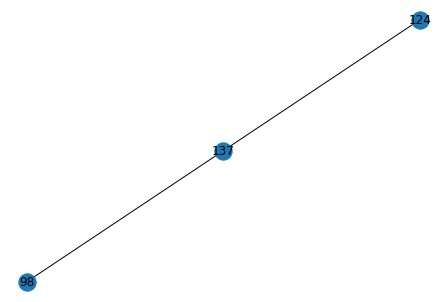

match_branches = []
edges_to_delete (resolve crossover) = [[98, 124], [98, 137], [124, 137]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 98, 124]), array([ 98, 137]), array([124, 137])]
edges_to_create = []
Number of connected components = 12
Comp 0 = {136, 141, 142, 148, 21, 151, 152, 25, 153, 29, 158, 33, 34, 36, 164, 38, 37, 40, 41, 167, 43, 44, 48, 49, 50, 51, 53, 54, 55, 58, 59, 60, 61, 62, 66, 69, 70, 71, 72, 78, 79, 80, 81, 83, 86, 87, 91, 92, 94, 96, 108, 117, 122, 123}
Comp 1 = {42, 52, 65, 74, 85, 88, 89, 93, 95, 97, 100, 102, 105, 106, 110, 111, 114, 115, 116, 120, 121, 126, 127, 129, 130, 132, 135, 138, 139, 140, 145, 146, 149, 150, 154, 159, 160, 172, 173, 174, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 214, 216, 217, 219, 220, 221, 222, 229, 231, 235, 236, 237, 239, 240, 241, 245, 252, 259, 329}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9,

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 12
Total number of graphs at the end of the split AFTER DIRECTIONAL = 12
No valid path so moving onto the next connection


---- working on disconnecting 139 and 150
---- This disconnects S0_2 from S0_5  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 12
Total number of graphs at the end of the split AFTER DIRECTIONAL = 12
Shortest path = [139, 129, 116, 115, 149, 150]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 65 111 115 116 127 129 132 135 138 149 154 329]
Short segments to combine = [111]


-------- Removing Segments -------------
curr_short_seg_revised = 111
np.sum(touch_len>0) = 2
Using average sti

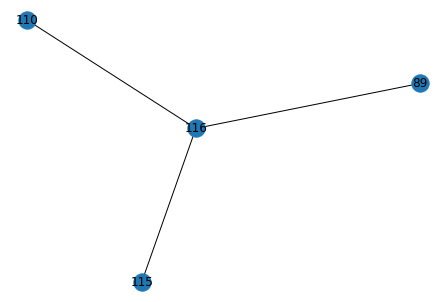

match_branches = [[89, 110]]
edges_to_delete (resolve crossover) = [[89, 115], [89, 116], [110, 115], [110, 116], [115, 116]]
edges_to_create (resolve crossover) = [[89, 110]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 962365.27644945 1037314.20585017  996458.10940031] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
***inside resolve crossover!!!!****
coordinate_branches = [116, 129, 132, 135]
116 = red
129 = aqua
132 = purple
135 = green
Angle between 116 and 129 = 113.36 
Angle between 116 and 132 = 90.52 
Angle between 116 and 135 = 23.93 
Angle between 129 and 132 = 32.86 
Angle between 129 and 135 = 89.43 
Angle between 132 and 135 = 65.6

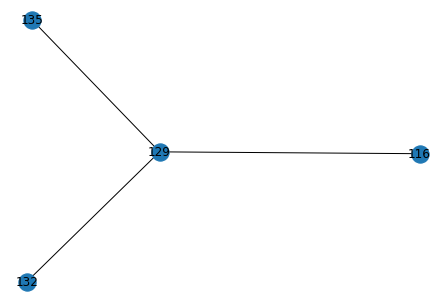

match_branches = [[116, 135], [129, 132]]
edges_to_delete (resolve crossover) = [[116, 129], [116, 132], [129, 135], [132, 135]]
edges_to_create (resolve crossover) = [[116, 135], [129, 132]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 965333.27381148 1051292.00795293 1006652.53134804] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
***inside resolve crossover!!!!****
coordinate_branches = [127, 129, 138, 139, 329]
127 = red
129 = aqua
138 = purple
139 = green
Angle between 127 and 129 = 90.92 
Angle between 127 and 138 = 117.47 
Angle between 127 and 139 = 15.6 
Angle between 127 and 329 = 138.18 
Angle between 129 and 138 = 31.21 
Angle betwe

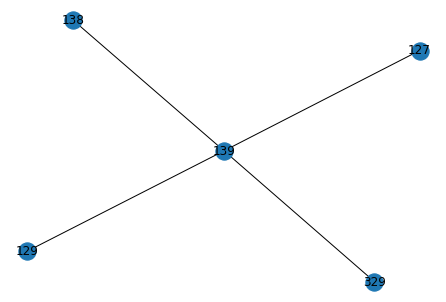

match_branches = [[127, 139], [129, 138]]
edges_to_delete (resolve crossover) = [[127, 129], [127, 138], [127, 329], [129, 139], [129, 329], [138, 139], [138, 329], [139, 329]]
edges_to_create (resolve crossover) = [[127, 139], [129, 138]]
curr_limb.deleted_edges 5 =[array([123, 135]), array([135, 141]), array([144, 146]), array([146, 163]), array([ 98, 124]), array([ 98, 137]), array([124, 137])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [139 129]: curr_angle = 94.3
  Edge: [129 116]: curr_angle = 110.96
  Edge: [116 115]: curr_angle = 145.26
  Edge: [115 149]: curr_angle = 81.46
  Edge: [149 150]: curr_angle = 23.45

Total time for doubling_back = 0.2669546604156494
There were 4 edges that passed doubling back threshold of 80
Winning edge [116 115] had a doubling back of 145.26095764900825
***inside resolve crossover!!!!****
coordinate_branches = [89, 110, 115, 116]
89 = red
110 = aqua
115 = purple
116 = green
Angle between 89 and 110 = 46.94 
Angle between 89 and 115 = 61.43 
Angle between 89 and 116 = 8.76 
Angle between 110 and 115 = 74.61 
Angle between 110 and 116 = 135.8 
Angle between 115 and 116 = 118.28 
Final Matches = [[89, 116]]
matched_branches_revised = [[89, 116]]
Original graph


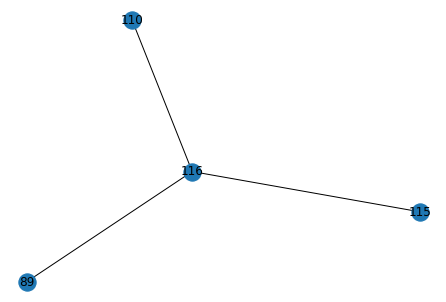

match_branches = [[89, 116]]
edges_to_delete (resolve crossover) = [[89, 110], [89, 115], [110, 115], [110, 116], [115, 116]]
edges_to_create (resolve crossover) = [[89, 116]]
edges_to_delete (cut_limb_network) = [array([ 89, 110]), array([ 89, 115]), array([110, 115]), array([110, 116]), array([115, 116])]
edges_to_create = [[89, 116]]
Number of connected components = 15
Comp 0 = {136, 141, 142, 148, 21, 151, 152, 25, 153, 29, 158, 33, 34, 36, 164, 38, 37, 40, 41, 167, 43, 44, 48, 49, 50, 51, 53, 54, 55, 58, 59, 60, 61, 62, 66, 69, 70, 71, 72, 78, 79, 80, 81, 83, 86, 87, 91, 92, 94, 96, 108, 117, 122, 123}
Comp 1 = {129, 130, 259, 132, 135, 138, 139, 140, 145, 146, 159, 160, 42, 172, 52, 181, 182, 183, 184, 185, 186, 88, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 329, 74, 201, 202, 203, 205, 207, 208, 204, 210, 206, 85, 214, 216, 89, 217, 219, 220, 93, 222, 95, 221, 97, 100, 229, 102, 231, 105, 106, 235, 236, 237, 239, 240, 241, 114, 116, 245, 120, 121, 252, 126,

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 15
Total number of graphs at the end of the split AFTER DIRECTIONAL = 15
No valid path so moving onto the next connection


---- working on disconnecting 139 and 170
---- This disconnects S0_2 from S0_4  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 15
Total number of graphs at the end of the split AFTER DIRECTIONAL = 15
No valid path so moving onto the next connection


---- working on disconnecting 150 and 170
---- This disconnects S0_5 from S0_4  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 15
Total number of graphs at the end of the split AFTER DIRECTIONAL = 15
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 15: [array([136, 141, 142, 148,  21, 151, 152,  25, 153,  29, 158,  33,  34,
        36, 164,  38,  37,  40,  41, 167,  43,  44, 

  Edge: [1 4]: curr_angle = 158.18

Total time for doubling_back = 0.040184974670410156
There were 1 edges that passed doubling back threshold of 80
Winning edge [1 4] had a doubling back of 158.1821953071434
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 4]
1 = red
2 = aqua
4 = purple
Angle between 1 and 2 = 43.04 
Angle between 1 and 4 = 147.49 
Angle between 2 and 4 = 15.59 
Final Matches = [[2, 4]]
matched_branches_revised = [[2, 4]]
Original graph


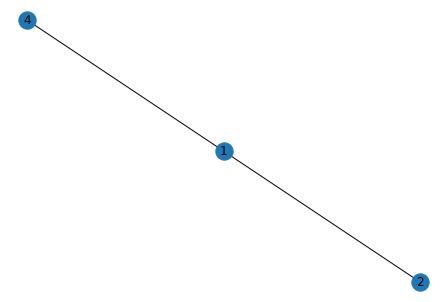

match_branches = [[2, 4]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 4]]
edges_to_create (resolve crossover) = [[2, 4]]
edges_to_delete (cut_limb_network) = [array([1, 2]), array([1, 4])]
edges_to_create = [[2, 4]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4}
Comp 1 = {1}
curr_limb_copy.deleted_edges = [array([1, 2]), array([1, 4])]
curr_limb_copy.created_edges = [[2, 4]]
After get best cut: cut_edges = [array([1, 2]), array([1, 4])], added_edges = [[2, 4]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1244290.   804198.1  680115.6]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 2, 3, 4]), array([1])]


 ------ Total time for Splitting 864691135975474243 = 19.931909799575806 ------


----- Working on Neuron 864691136194017494-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691136194017494 = 5.255536079406738 ------


----- Working on Neuron 864691135348302295-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135348302295 = 19.04763627052307 ------


----- Working on Neuron 864691135865576837-------
Decompressing Neuron in minimal output mode...please wait
multi_soma

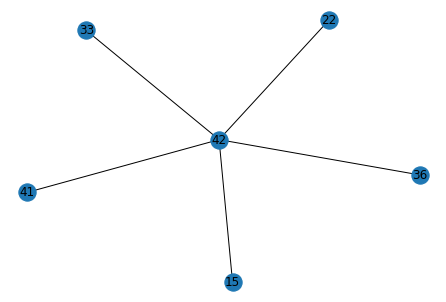

match_branches = [[15, 41], [33, 36], [22, 42]]
edges_to_delete (resolve crossover) = [[15, 22], [15, 33], [15, 36], [15, 42], [22, 33], [22, 36], [22, 41], [33, 41], [33, 42], [36, 41], [36, 42], [41, 42]]
edges_to_create (resolve crossover) = [[15, 41], [33, 36], [22, 42]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1231500.46058897  859220.552884   1041953.93162169] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [19, 36, 45, 48, 49]
19 = red
36 = aqua
45 = purple
48 = green
Angle between 19 and 36 = 109.68 
Angle between 19 and 45 = 67.75 
Angle between 19 and 48 = 29.53 
Angle between 19 and 49 = 32.68 
Angle between 36 and 45 = 33.42 
Angle between 36 and 48 = 98.95 
Angle between 36 and 49 = 65.98 
Angle between 45 and 48 = 92.26 
Angle between 45 and 49 = 97.69 
Angle between 48 and 49 = 127.17 
Final Matches = [[19, 48], [19, 49], [36, 

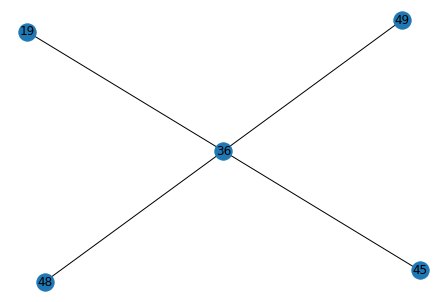

match_branches = [[19, 48], [36, 45]]
edges_to_delete (resolve crossover) = [[19, 36], [19, 45], [19, 49], [36, 48], [36, 49], [45, 48], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[19, 48], [36, 45]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [27 42]: curr_angle = 49.44
  Edge: [42 36]: curr_angle = 122.88
  Edge: [36 45]: curr_angle = 29.91
  Edge: [45 43]: curr_angle = 94.13

Total time for doubling_back = 0.22727298736572266
There were 2 edges that passed doubling back threshold of 80
Winning edge [42 36] had a doubling back of 122.88266237404252
***inside resolve crossover!!!!****
coordinate_branches = [15, 22, 33, 36, 41, 42]
15 = red
22 = aqua
33 = purple
36 = green
Angle between 15 and 22 = 147.94 
Angle between 15 and 33 = 99.74 
Angle between 15 and 36 = 87.8 
Angle between 15 and 41 = 12.77 
Angle between 15 and 42 = 18.49 
Angle between 22 and 33 = 97.23 
Angle between 22 and 36 = 77.03 
Angle between 22 and 41 = 31.39 
Angle between 22 and 42 = 24.13 
Angle between 33 and 36 = 24.19 
Angle between 33 and 41 = 67.97 
Angle between 33 and 42 = 66.93 
Angle between 36 and 41 = 104.85 
Angle between 36 and 42 = 109.62 
Angle between 41 and 42 = 170.91 
Final Matches = [[15, 41], [15, 42], [22, 41], [22, 42],

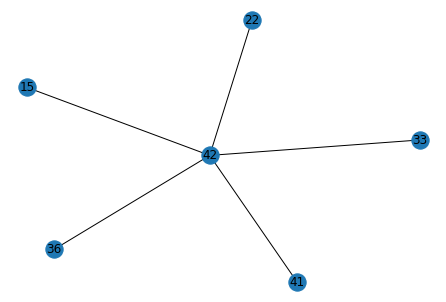

match_branches = [[15, 41], [22, 42], [33, 36]]
edges_to_delete (resolve crossover) = [[15, 22], [15, 33], [15, 36], [15, 42], [22, 33], [22, 36], [22, 41], [33, 41], [33, 42], [36, 41], [36, 42], [41, 42]]
edges_to_create (resolve crossover) = [[15, 41], [22, 42], [33, 36]]
Rejecting creating edge [15, 41] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([15, 22]), array([15, 33]), array([15, 36]), array([15, 42]), array([22, 33]), array([22, 36]), array([22, 41]), array([33, 41]), array([33, 42]), array([36, 41]), array([36, 42]), array([41, 42])]
edges_to_create = [[22, 42], [33, 36]]
Number of connected components = 6
Comp 0 = {42, 44, 50, 54, 22, 27}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 26, 28, 29, 38, 39, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96}
Comp 2 = 

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 6
Total number of graphs at the end of the split AFTER DIRECTIONAL = 6
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 6: [array([42, 44, 50, 54, 22, 27]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 26, 28, 29, 38, 39, 51, 52, 53, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95,
       96]), array([32, 33, 34, 35, 36, 37, 43, 45, 47, 48, 49, 19, 23, 24, 25, 91, 92,
       30, 31]), array([41]), array([40]), array([46])]


 -------- Working on limb 1------------
Starting combinations to process = [[32 77]]


---- working on disconnecting 32 and 77
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the spli

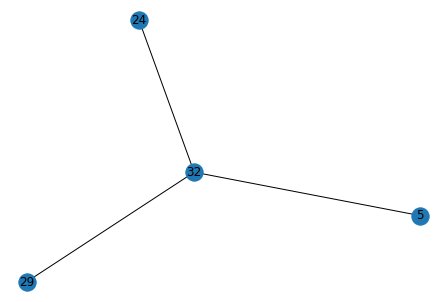

match_branches = [[5, 32]]
edges_to_delete (resolve crossover) = [[5, 24], [5, 29], [24, 29], [24, 32], [29, 32]]
edges_to_create (resolve crossover) = [[5, 32]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [32 29]: curr_angle = 57.37
  Edge: [29 28]: curr_angle = 145.22
  Edge: [28 74]: curr_angle = 39.39
  Edge: [74 75]: curr_angle = 67.28
  Edge: [75 77]: curr_angle = 102.3

Total time for doubling_back = 0.4305708408355713
There were 2 edges that passed doubling back threshold of 80
Winning edge [29 28] had a doubling back of 145.2163266863145
***inside resolve crossover!!!!****
coordinate_branches = [26, 28, 29]
26 = red
28 = aqua
29 = purple
Angle between 26 and 28 = 32.32 
Angle between 26 and 29 = 53.36 
Angle between 28 and 29 = 155.34 
Final Matches = [[26, 28]]
matched_branches_revised = [[26, 28]]
Original graph


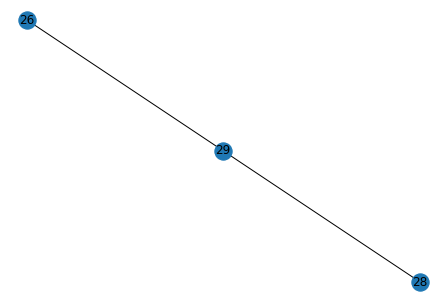

match_branches = [[26, 28]]
edges_to_delete (resolve crossover) = [[26, 29], [28, 29]]
edges_to_create (resolve crossover) = [[26, 28]]
edges_to_delete (cut_limb_network) = [array([26, 29]), array([28, 29])]
edges_to_create = [[26, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81}
Comp 1 = {32, 2, 4, 5, 24, 29}
Comp 2 = {31}
curr_limb_copy.deleted_edges = [array([26, 29]), array([28, 29])]
curr_limb_copy.created_edges = [[26, 28]]
After get best cut: cut_edges = [array([26, 29]), array([28, 29])], added_edges = [[26, 28]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1182894.72430218  863058.89137586 1030318.55321237]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  1,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81]), array([32,  2,  4,  5, 24, 29]), array([31])]


 ------ Total time for Splitting 864691135865576837 = 152.49978923797607 ------


----- Working on Neuron 864691135799739490-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [1]


 -------- Working on limb 1------------
Starting combinations to process = [[13 14]]

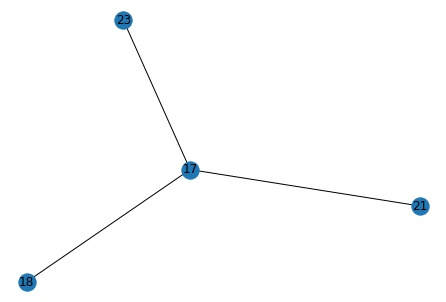

match_branches = []
edges_to_delete (resolve crossover) = [[17, 18], [17, 21], [17, 23], [18, 21], [18, 23], [21, 23]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [13 15]: curr_angle = 31.15
  Edge: [15 11]: curr_angle = 15.7
  Edge: [11 12]: curr_angle = 34.25
  Edge: [12 16]: curr_angle = 106.96
  Edge: [16 17]: curr_angle = 37.38
  Edge: [17 21]: curr_angle = 93.74
  Edge: [21 14]: curr_angle = 55.97

Total time for doubling_back = 0.28571343421936035
There were 2 edges that passed doubling back threshold of 80
Winning edge [12 16] had a doubling back of 106.96224001286956
***inside resolve crossover!!!!****
coordinate_branches = [8, 12, 16]
8 = red
12 = aqua
16 = purple
Angle between 8 and 12 = 97.41 
Angle between 8 and 16 = 38.05 
Angle between 12 and 16 = 109.01 
Final Matches = []
matched_branches_revised = []
Original graph


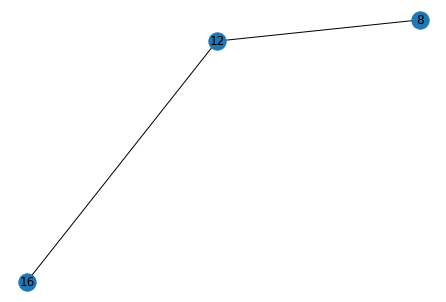

match_branches = []
edges_to_delete (resolve crossover) = [[8, 12], [8, 16], [12, 16]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 8, 12]), array([ 8, 16]), array([12, 16])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {2, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28}
Comp 1 = {8}
Comp 2 = {0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15}
Comp 3 = {22}
curr_limb_copy.deleted_edges = [array([ 8, 12]), array([ 8, 16]), array([12, 16])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([ 8, 12]), array([ 8, 16]), array([12, 16])], added_edges = []
total_soma_paths_to_cut = []


suggested_cut_points = [[1220091.07216277  992006.67230944  968167.2833151 ]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([ 2, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28]), array([8]), array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 15]), array([22])]


 ------ Total time for Splitting 864691135799739490 = 38.763609170913696 ------


----- Working on Neuron 864691135736483732-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135736483732 = 43.06563186645508 ------


----- Working on Neuron 864691135692737983-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135692737983 = 15.231231927871704 ------



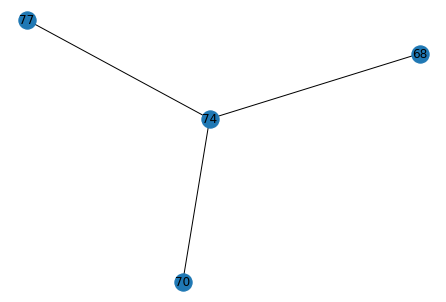

match_branches = [[68, 74]]
edges_to_delete (resolve crossover) = [[68, 70], [68, 77], [70, 74], [70, 77], [74, 77]]
edges_to_create (resolve crossover) = [[68, 74]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1387680.  703847.  780169.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [66, 90, 108, 109]
66 = red
90 = aqua
108 = purple
109 = green
Angle between 66 and 90 = 126.91 
Angle between 66 and 108 = 54.19 
Angle between 66 and 109 = 2.33 
Angle between 90 and 108 = 13.88 
Angle between 90 and 109 = 54.65 
Angle between 108 and 109 = 124.83 
Final Matches = [[66, 109], [90, 108]]
matched_branches_revised = [[66, 109], [90, 108]]
Original graph


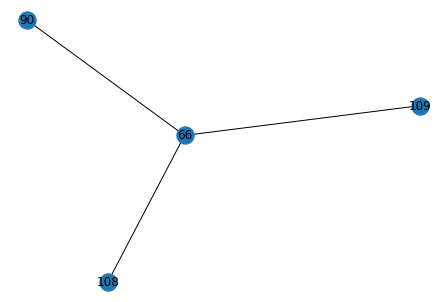

match_branches = [[66, 109], [90, 108]]
edges_to_delete (resolve crossover) = [[66, 90], [66, 108], [90, 109], [108, 109]]
edges_to_create (resolve crossover) = [[66, 109], [90, 108]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [62 63]: curr_angle = 73.83
  Edge: [63 66]: curr_angle = 34.72
  Edge: [66 90]: curr_angle = 139.37
  Edge: [90 74]: curr_angle = 19.4
  Edge: [74 68]: curr_angle = 24.23

Total time for doubling_back = 0.5206913948059082
There were 1 edges that passed doubling back threshold of 80
Winning edge [66 90] had a doubling back of 139.36636157675935
***inside resolve crossover!!!!****
coordinate_branches = [66, 90, 108, 109]
66 = red
90 = aqua
108 = purple
109 = green
Angle between 66 and 90 = 93.59 
Angle between 66 and 108 = 46.24 
Angle between 66 and 109 = 10.09 
Angle between 90 and 108 = 86.56 
Angle between 90 and 109 = 96.16 
Angle between 108 and 109 = 135.31 
Final Matches = [[66, 109]]
matched_branches_revised = [[66, 109]]
Original graph


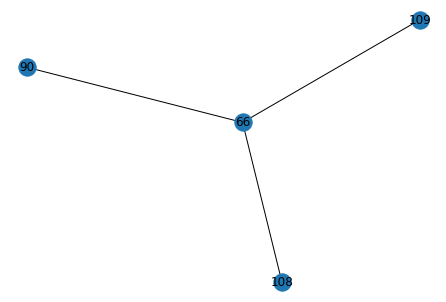

match_branches = [[66, 109]]
edges_to_delete (resolve crossover) = [[66, 90], [66, 108], [90, 108], [90, 109], [108, 109]]
edges_to_create (resolve crossover) = [[66, 109]]
edges_to_delete (cut_limb_network) = [array([66, 90]), array([ 66, 108]), array([ 90, 108]), array([ 90, 109]), array([108, 109])]
edges_to_create = [[66, 109]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109}
Comp 1 = {68, 70, 74, 107, 106, 77, 89, 90}
Comp 2 = {108}
curr_limb_copy.deleted_edges = [array([66, 90]), array([ 66, 108]), array([ 90, 108]), array([ 90, 109]), array([108, 109])]
curr_limb_copy.created_edges = [[66,

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  69,  71,  72,  73,  75,  76,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 109]), array([ 68,  70,  74, 107, 106,  77,  89,  90]), array([108])]


 ------ Total time for Splitting 864691135617764239 = 137.63281059265137 ------

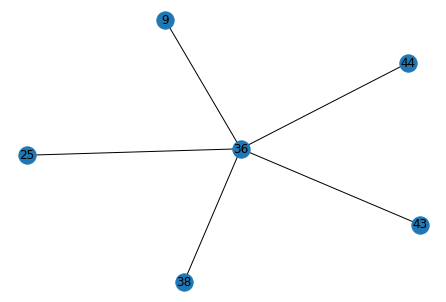

match_branches = [[9, 38], [25, 44]]
edges_to_delete (resolve crossover) = [[9, 25], [9, 36], [9, 43], [9, 44], [25, 36], [25, 38], [25, 43], [36, 38], [36, 43], [36, 44], [38, 43], [38, 44], [43, 44]]
edges_to_create (resolve crossover) = [[9, 38], [25, 44]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1277684.80084883  948033.48104994 1073488.7602247 ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [37, 40, 43, 45]
37 = red
40 = aqua
43 = purple
45 = green
Angle between 37 and 40 = 166.79 
Angle between 37 and 43 = 42.56 
Angle between 37 and 45 = 96.05 
Angle between 40 and 43 = 53.69 
Angle between 40 and 45 = 82.84 
Angle between 43 and 45 = 51.77 
Final Matches = []
matched_branches_revised = []
Original graph


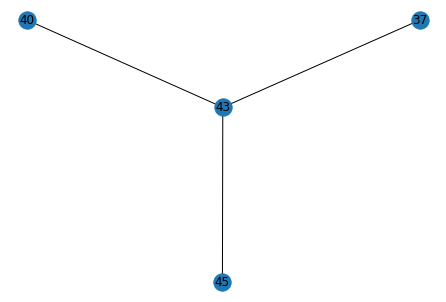

match_branches = []
edges_to_delete (resolve crossover) = [[37, 40], [37, 43], [37, 45], [40, 43], [40, 45], [43, 45]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 35 because skeletal distance was 2471.964213879134 and threshold was 2500
skip_nodes = [35]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [36 43]: curr_angle = 141.31
  Edge: [43 40]: curr_angle = 49.4
  Edge: [40 53]: curr_angle = 97.57

Total time for doubling_back = 0.2498912811279297
There were 2 edges that passed doubling back threshold of 80
Winning edge [36 43] had a doubling back of 141.30685689039382
***inside resolve crossover!!!!****
coordinate_branches = [9, 25, 36, 38, 43, 44]
9 = red
25 = aqua
36 = purple
38 = green
Angle between 9 and 25 = 148.45 
Angle between 9 and 36 = 85.04 
Angle between 9 and 38 = 21.42 
Angle between 9 and 43 = 71.89 
Angle between 9 and 44 = 21.69 
Angle between 25 and 36 = 61.08 
Angle between 25 and 38 = 52.84 
Angle between 25 and 43 = 103.2 
Angle between 25 and 44 = 12.49 
Angle between 36 and 38 = 76.48 
Angle between 36 and 43 = 38.23 
Angle between 36 and 44 = 106.76 
Angle between 38 and 43 = 129.53 
Angle between 38 and 44 = 137.99 
Angle between 43 and 44 = 88.26 
Final Matches = [[9, 38], [9, 44], [25, 44]]
matched_branches_revised = [[25, 44], [9, 38]]
Original

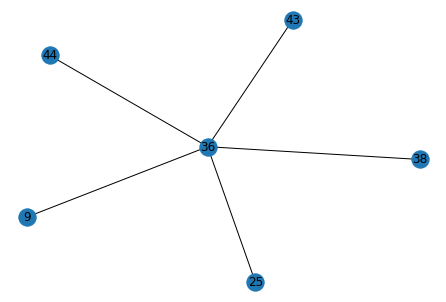

match_branches = [[25, 44], [9, 38]]
edges_to_delete (resolve crossover) = [[9, 25], [9, 36], [9, 43], [9, 44], [25, 36], [25, 38], [25, 43], [36, 38], [36, 43], [36, 44], [38, 43], [38, 44], [43, 44]]
edges_to_create (resolve crossover) = [[25, 44], [9, 38]]
Rejecting creating edge [25, 44] becuase did not involve only 1 node in the deleted edge
Rejecting creating edge [9, 38] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 9, 25]), array([ 9, 36]), array([ 9, 43]), array([ 9, 44]), array([25, 36]), array([25, 38]), array([25, 43]), array([36, 38]), array([36, 43]), array([36, 44]), array([38, 43]), array([38, 44]), array([43, 44])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {0, 35, 36, 5, 11}
Comp 1 = {9}
Comp 2 = {2, 3, 4, 6, 7, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 3 = {1, 38, 10, 46, 47, 48, 51, 52, 54, 55, 56, 57, 58}
Comp 4 = {37, 40, 8, 43, 45, 15, 16, 

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 9
Total number of graphs at the end of the split AFTER DIRECTIONAL = 9
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 9: [array([ 0, 35, 36,  5, 11]), array([9]), array([ 2,  3,  4,  6,  7, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 1, 38, 10, 46, 47, 48, 51, 52, 54, 55, 56, 57, 58]), array([37, 40,  8, 43, 45, 15, 16, 53, 59]), array([49, 50, 44]), array([39]), array([41]), array([42])]


 ------ Total time for Splitting 864691135982744778 = 47.05056691169739 ------


----- Working on Neuron 864691136023751737-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691136023751737 = 70.05095267295837 ------


----- Working on Neuron 864691136201213630-------
Decompressi

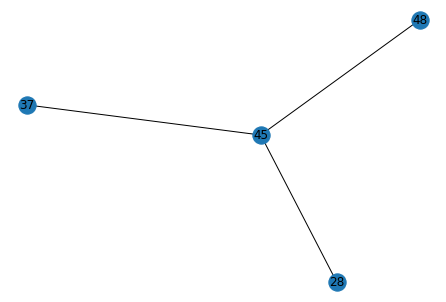

match_branches = [[37, 45], [28, 48]]
edges_to_delete (resolve crossover) = [[28, 37], [28, 45], [37, 48], [45, 48]]
edges_to_create (resolve crossover) = [[37, 45], [28, 48]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1343828.72542948  692575.01029924 1044261.86235682] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [47, 53, 54, 59]
47 = red
53 = aqua
54 = purple
59 = green
Angle between 47 and 53 = 83.33 
Angle between 47 and 54 = 130.3 
Angle between 47 and 59 = 25.23 
Angle between 53 and 54 = 45.85 
Angle between 53 and 59 = 82.14 
Angle between 54 and 59 = 54.17 
Final Matches = [[47, 59]]
matched_branches_revised = [[47, 59]]
Original graph


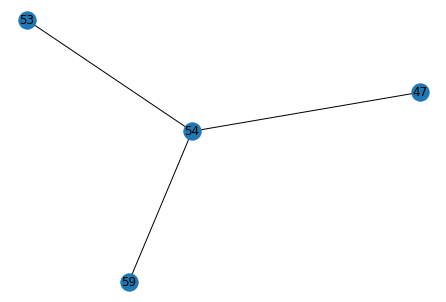

match_branches = [[47, 59]]
edges_to_delete (resolve crossover) = [[47, 53], [47, 54], [53, 54], [53, 59], [54, 59]]
edges_to_create (resolve crossover) = [[47, 59]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1344127.79021827  695260.44386816 1086998.49540753] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [5, 48, 57, 58]
5 = red
48 = aqua
57 = purple
58 = green
Angle between 5 and 48 = 127.27 
Angle between 5 and 57 = 11.92 
Angle between 5 and 58 = 52.99 
Angle between 48 and 57 = 43.5 
Angle between 48 and 58 = 6.91 
Angle between 57 and 58 = 134.93 
Final Matches = [[5, 57], [48, 58]]
matched_branches_revised = [[48, 58], [5, 57]]
Original graph


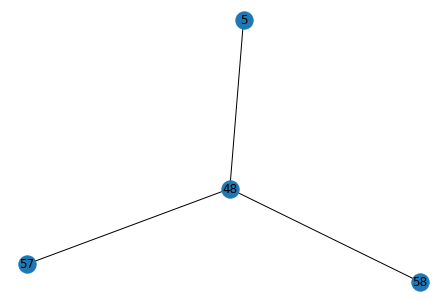

match_branches = [[48, 58], [5, 57]]
edges_to_delete (resolve crossover) = [[5, 48], [5, 58], [48, 57], [57, 58]]
edges_to_create (resolve crossover) = [[48, 58], [5, 57]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1353360.  679282. 1049980.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [16, 72, 74, 76]
16 = red
72 = aqua
74 = purple
76 = green
Angle between 16 and 72 = 122.04 
Angle between 16 and 74 = 89.1 
Angle between 16 and 76 = 51.58 
Angle between 72 and 74 = 105.56 
Angle between 72 and 76 = 35.02 
Angle between 74 and 76 = 108.79 
Final Matches = []
matched_branches_revised = []
Original graph


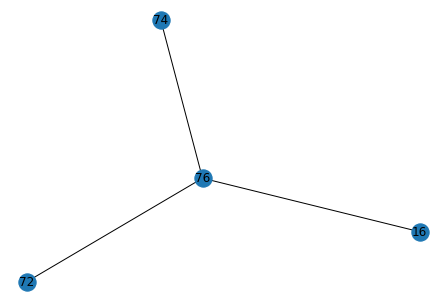

match_branches = []
edges_to_delete (resolve crossover) = [[16, 72], [16, 74], [16, 76], [72, 74], [72, 76], [74, 76]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1357726.6062523   683313.49850127 1046488.22167794] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [77, 82, 84, 85]
77 = red
82 = aqua
84 = purple
85 = green
Angle between 77 and 82 = 79.19 
Angle between 77 and 84 = 93.51 
Angle between 77 and 85 = 27.91 
Angle between 82 and 84 = 12.96 
Angle between 82 and 85 = 73.06 
Angle between 84 and 85 = 114.3 
Final Matches = [[77, 85], [82, 84]]
matched_branches_revised = [[82, 84], [77, 85]]
Original graph


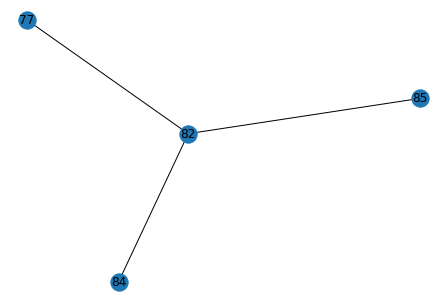

match_branches = [[82, 84], [77, 85]]
edges_to_delete (resolve crossover) = [[77, 82], [77, 84], [82, 85], [84, 85]]
edges_to_create (resolve crossover) = [[82, 84], [77, 85]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 48]: curr_angle = 79.6
  Edge: [48 57]: curr_angle = 79.97
  Edge: [57 79]: curr_angle = 23.04
  Edge: [79 82]: curr_angle = 59.17
  Edge: [82 77]: curr_angle = 106.94
  Edge: [77 76]: curr_angle = 80.79
  Edge: [76 72]: curr_angle = 65.06
  Edge: [72 66]: curr_angle = 49.63
  Edge: [66 67]: curr_angle = 82.07
  Edge: [67 54]: curr_angle = 132.96
  Edge: [54 59]: curr_angle = 73.47
  Edge: [59 60]: curr_angle = 57.17
  Edge: [60 56]: curr_angle = 29.48

Total time for doubling_back = 0.6762471199035645
There were 4 edges that passed doubling back threshold of 80
Winning edge [67 54] had a doubling back of 132.96129072877602
***inside resolve crossover!!!!****
coordinate_branches = [52, 54, 67]
52 = red
54 = aqua
67 = purple
Angle between 52 and 54 = 28.74 
Angle between 52 and 67 = 92.82 
Angle between 54 and 67 = 86.43 
Final Matches = [[52, 54]]
matched_branches_revised = [[52, 54]]
Original graph


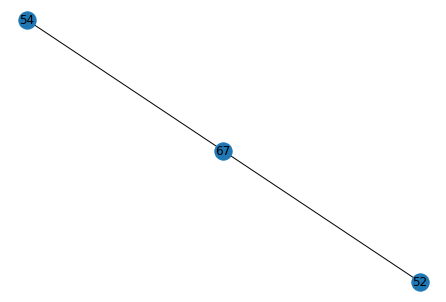

match_branches = [[52, 54]]
edges_to_delete (resolve crossover) = [[52, 67], [54, 67]]
edges_to_create (resolve crossover) = [[52, 54]]
edges_to_delete (cut_limb_network) = [array([52, 67]), array([54, 67])]
edges_to_create = [[52, 54]]
Number of connected components = 4
Comp 0 = {4, 5, 9, 16, 20, 26, 28, 29, 33, 37, 45, 46, 48, 57, 58, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {0, 1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 27, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 64}
Comp 2 = {55}
Comp 3 = {83}
curr_limb_copy.deleted_edges = [array([52, 67]), array([54, 67])]
curr_limb_copy.created_edges = [[52, 54]]
After get best cut: cut_edges = [array([52, 67]), array([54, 67])], added_edges = [[52, 54]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1351734.52006623  665951.61755332 1036453.84706791]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 45 and 65
---- This disconnects S0_0 from S0_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
Shortest path = [45, 48, 57, 79, 82, 77, 73, 65]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[array([52, 67]), array([54, 67])]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 5 28 37 48 57 58 62 71 73 76 77 79 81 82 84 85]
Short segments to combine = []
Found 3 high degree coordinates to cut
Picking [1339682.53363201  694664.07787016 1086805.31623131] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([52, 67]), array([54, 67])]
***inside resolve crossover

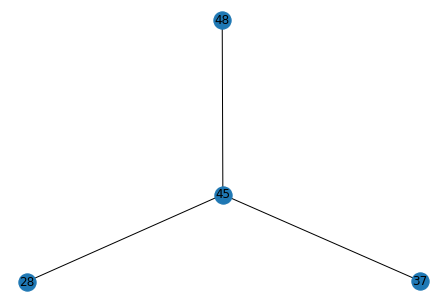

match_branches = [[37, 45], [28, 48]]
edges_to_delete (resolve crossover) = [[28, 37], [28, 45], [37, 48], [45, 48]]
edges_to_create (resolve crossover) = [[37, 45], [28, 48]]
curr_limb.deleted_edges 5 =[array([52, 67]), array([54, 67])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1344127.79021827  695260.44386816 1086998.49540753] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([52, 67]), array([54, 67])]
***inside resolve crossover!!!!****
coordinate_branches = [5, 48, 57, 58]
5 = red
48 = aqua
57 = purple
58 = green
Angle between 5 and 48 = 127.27 
Angle between 5 and 57 = 11.92 
Angle between 5 and 58 = 52.99 
Angle between 48 and 57 = 43.5 
Angle between 48 and 58 = 6.91 
Angle between 57 and 58 = 134.93 
Final Matches = [[5, 57], [48, 58]]
matched_branches_revised = [[48, 58], [5, 57]]
Original graph


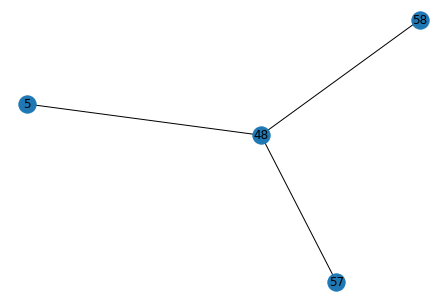

match_branches = [[48, 58], [5, 57]]
edges_to_delete (resolve crossover) = [[5, 48], [5, 58], [48, 57], [57, 58]]
edges_to_create (resolve crossover) = [[48, 58], [5, 57]]
curr_limb.deleted_edges 5 =[array([52, 67]), array([54, 67])]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1357726.6062523   683313.49850127 1046488.22167794] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([52, 67]), array([54, 67])]
***inside resolve crossover!!!!****
coordinate_branches = [77, 82, 84, 85]
77 = red
82 = aqua
84 = purple
85 = green
Angle between 77 and 82 = 79.19 
Angle between 77 and 84 = 93.51 
Angle between 77 and 85 = 27.91 
Angle between 82 and 84 = 12.96 
Angle between 82 and 85 = 73.06 
Angle between 84 and 85 = 114.3 
Final Matches = [[77, 85], [82, 84]]
matched_branches_revised = [[82, 84], [77, 85]]
Original graph


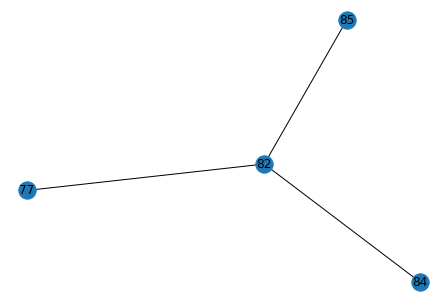

match_branches = [[82, 84], [77, 85]]
edges_to_delete (resolve crossover) = [[77, 82], [77, 84], [82, 85], [84, 85]]
edges_to_create (resolve crossover) = [[82, 84], [77, 85]]
curr_limb.deleted_edges 5 =[array([52, 67]), array([54, 67])]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 48]: curr_angle = 79.6
  Edge: [48 57]: curr_angle = 79.97
  Edge: [57 79]: curr_angle = 23.04
  Edge: [79 82]: curr_angle = 59.17
  Edge: [82 77]: curr_angle = 106.94
  Edge: [77 73]: curr_angle = 79.4
  Edge: [73 65]: curr_angle = 25.82

Total time for doubling_back = 0.39545154571533203
There were 1 edges that passed doubling back threshold of 80
Winning edge [82 77] had a doubling back of 106.9441745168526
***inside resolve crossover!!!!****
coordinate_branches = [77, 82, 84, 85]
77 = red
82 = aqua
84 = purple
85 = green
Angle between 77 and 82 = 91.94 
Angle between 77 and 84 = 96.82 
Angle between 77 and 85 = 31.49 
Angle between 82 and 84 = 13.56 
Angle between 82 and 85 = 58.31 
Angle between 84 and 85 = 114.38 
Final Matches = [[77, 85], [82, 84]]
matched_branches_revised = [[82, 84], [77, 85]]
Original graph


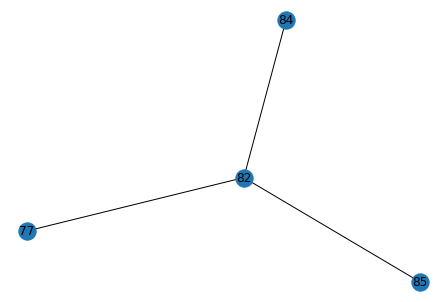

match_branches = [[82, 84], [77, 85]]
edges_to_delete (resolve crossover) = [[77, 82], [77, 84], [82, 85], [84, 85]]
edges_to_create (resolve crossover) = [[82, 84], [77, 85]]
edges_to_delete (cut_limb_network) = [array([77, 82]), array([77, 84]), array([82, 85]), array([84, 85])]
edges_to_create = [[82, 84], [77, 85]]
Number of connected components = 5
Comp 0 = {4, 5, 9, 20, 26, 28, 29, 33, 37, 45, 48, 57, 58, 62, 68, 79, 80, 81, 82, 84, 87}
Comp 1 = {16, 46, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 2 = {0, 1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 27, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 64}
Comp 3 = {55}
Comp 4 = {83}
curr_limb_copy.deleted_edges = [array([52, 67]), array([54, 67]), array([77, 82]), array([77, 84]), array([82, 85]), array([84, 85])]
curr_limb_copy.created_edges = [[52, 54], [82, 84], [77, 85]]
After get best cut: cut_

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection


---- working on disconnecting 56 and 65
---- This disconnects S0_1 from S0_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5: [array([ 4,  5,  9, 20, 26, 28, 29, 33, 37, 45, 48, 57, 58, 62, 68, 79, 80,
       81, 82, 84, 87]), array([16, 46, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 85,
       86, 88, 89, 90, 91, 92, 93, 94, 95]), array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21,
       22, 23, 24, 25, 27, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43,
       44, 47, 49, 50, 51, 52, 53, 54, 56, 59, 60, 

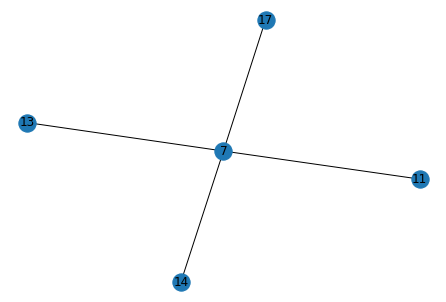

match_branches = [[11, 14], [7, 17]]
edges_to_delete (resolve crossover) = [[7, 11], [7, 13], [7, 14], [11, 13], [11, 17], [13, 14], [13, 17], [14, 17]]
edges_to_create (resolve crossover) = [[11, 14], [7, 17]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [1369513.16238446  921833.28729017  990279.46527378] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [8, 16, 20, 21]
8 = red
16 = aqua
20 = purple
21 = green
Angle between 8 and 16 = 113.11 
Angle between 8 and 20 = 15.4 
Angle between 8 and 21 = 100.01 
Angle between 16 and 20 = 63.94 
Angle between 16 and 21 = 43.66 
Angle between 20 and 21 = 76.49 
Final Matches = [[8, 20]]
matched_branches_revised = [[8, 20]]
Original graph


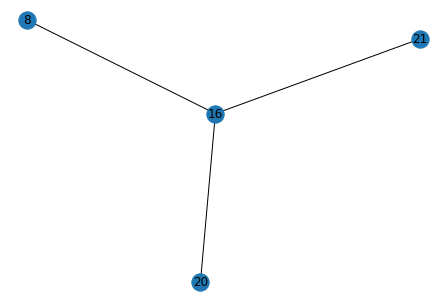

match_branches = [[8, 20]]
edges_to_delete (resolve crossover) = [[8, 16], [8, 21], [16, 20], [16, 21], [20, 21]]
edges_to_create (resolve crossover) = [[8, 20]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [3 5]: curr_angle = 37.97
  Edge: [5 9]: curr_angle = 13.35
  Edge: [ 9 16]: curr_angle = 77.13
  Edge: [16  8]: curr_angle = 150.45
  Edge: [8 7]: curr_angle = 137.7
  Edge: [ 7 11]: curr_angle = 143.39
  Edge: [11  6]: curr_angle = 46.39

Total time for doubling_back = 0.39490175247192383
There were 3 edges that passed doubling back threshold of 80
Winning edge [16  8] had a doubling back of 150.44880337801078
***inside resolve crossover!!!!****
coordinate_branches = [8, 16, 20, 21]
8 = red
16 = aqua
20 = purple
21 = green
Angle between 8 and 16 = 105.27 
Angle between 8 and 20 = 4.55 
Angle between 8 and 21 = 99.44 
Angle between 16 and 20 = 70.98 
Angle between 16 and 21 = 62.0 
Angle between 20 and 21 = 80.47 
Final Matches = [[8, 20]]
matched_branches_revised = [[8, 20]]
Original graph


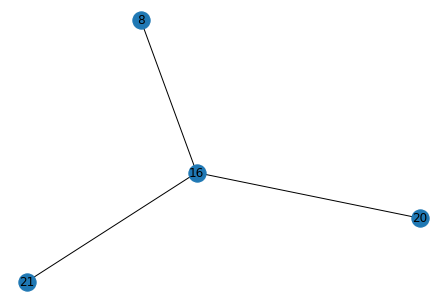

match_branches = [[8, 20]]
edges_to_delete (resolve crossover) = [[8, 16], [8, 21], [16, 20], [16, 21], [20, 21]]
edges_to_create (resolve crossover) = [[8, 20]]
edges_to_delete (cut_limb_network) = [array([ 8, 16]), array([ 8, 21]), array([16, 20]), array([16, 21]), array([20, 21])]
edges_to_create = [[8, 20]]
Number of connected components = 3
Comp 0 = {0, 3, 4, 5, 9, 10, 15, 16, 18, 19, 23, 24, 25, 26}
Comp 1 = {1, 2, 6, 7, 8, 11, 12, 13, 14, 17, 20, 22}
Comp 2 = {21}
curr_limb_copy.deleted_edges = [array([ 8, 16]), array([ 8, 21]), array([16, 20]), array([16, 21]), array([20, 21])]
curr_limb_copy.created_edges = [[8, 20]]
After get best cut: cut_edges = [array([ 8, 16]), array([ 8, 21]), array([16, 20]), array([16, 21]), array([20, 21])], added_edges = [[8, 20]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1369513.16238446  921833.28729017  990279.46527378]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  3,  4,  5,  9, 10, 15, 16, 18, 19, 23, 24, 25, 26]), array([ 1,  2,  6,  7,  8, 11, 12, 13, 14, 17, 20, 22]), array([21])]


 ------ Total time for Splitting 864691135428521008 = 49.29615235328674 ------


----- Working on Neuron 864691135212670336-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135212670336 = 20.610270977020264 ------


----- Working on Neuron 864691135269783717-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135269783717 = 23.406657457351685 ------


----- Working o

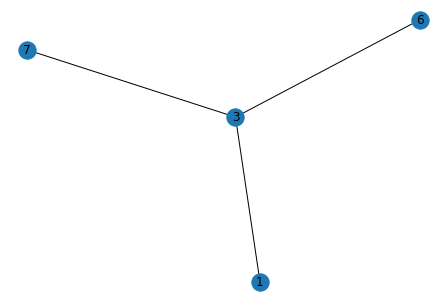

match_branches = [[1, 6]]
edges_to_delete (resolve crossover) = [[1, 3], [1, 7], [3, 6], [3, 7], [6, 7]]
edges_to_create (resolve crossover) = [[1, 6]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 3 because skeletal distance was 879.9208937053083 and threshold was 2500
Skipping endnode 4 because skeletal distance was 477.11180016703514 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [3 1]: curr_angle = 152.85
  Edge: [1 4]: curr_angle = 113.88

Total time for doubling_back = 0.050522804260253906
There were 2 edges that passed doubling back threshold of 80
Winning edge [3 1] had a doubling back of 152.8528877237857
***inside resolve crossover!!!!****
coordinate_branches = [1, 3, 6, 7]
1 = red
3 = aqua
6 = purple
7 = green
Angle between 1 and 3 = 153.09 
Angle between 1 and 6 = 8.76 
Angle between 1 and 7 = 57.41 
Angle between 3 and 6 = 28.78 
Angle between 3 and 7 = 64.17 
Angle between 6 and 7 = 131.34 
Final Matches = [[1, 6], [3, 6]]
matched_branches_revised = [[1, 6]]
Original graph


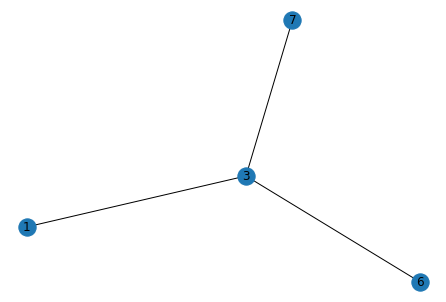

match_branches = [[1, 6]]
edges_to_delete (resolve crossover) = [[1, 3], [1, 7], [3, 6], [3, 7], [6, 7]]
edges_to_create (resolve crossover) = [[1, 6]]
edges_to_delete (cut_limb_network) = [array([1, 3]), array([1, 7]), array([3, 6]), array([3, 7]), array([6, 7])]
edges_to_create = [[1, 6]]
Number of connected components = 4
Comp 0 = {7}
Comp 1 = {0, 1, 4, 5, 6, 8, 9, 10}
Comp 2 = {3}
Comp 3 = {2}
curr_limb_copy.deleted_edges = [array([1, 3]), array([1, 7]), array([3, 6]), array([3, 7]), array([6, 7])]
curr_limb_copy.created_edges = [[1, 6]]
After get best cut: cut_edges = [array([1, 3]), array([1, 7]), array([3, 6]), array([3, 7]), array([6, 7])], added_edges = [[1, 6]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1477278.06504934  615875.65131208 1112724.62772515]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 3 and 7
---- This disconnects S0_2 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 3 and 8
---- This disconnects S0_2 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 4 and 7
---- This disconnects S0_3 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at 

  Edge: [0 8]: curr_angle = 99.39

Total time for doubling_back = 0.05244088172912598
There were 1 edges that passed doubling back threshold of 80
Winning edge [0 8] had a doubling back of 99.39147026134115
***inside resolve crossover!!!!****
coordinate_branches = [0, 5, 8]
0 = red
5 = aqua
8 = purple
Angle between 0 and 5 = 19.65 
Angle between 0 and 8 = 93.23 
Angle between 5 and 8 = 94.34 
Final Matches = [[0, 5]]
matched_branches_revised = [[0, 5]]
Original graph


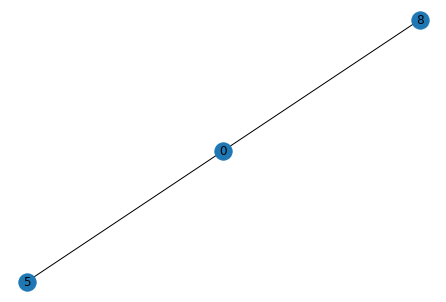

match_branches = [[0, 5]]
edges_to_delete (resolve crossover) = [[0, 8], [5, 8]]
edges_to_create (resolve crossover) = [[0, 5]]
edges_to_delete (cut_limb_network) = [array([0, 8]), array([5, 8])]
edges_to_create = [[0, 5]]
Number of connected components = 5
Comp 0 = {7}
Comp 1 = {0, 1, 4, 5, 6, 9, 10}
Comp 2 = {3}
Comp 3 = {8}
Comp 4 = {2}
curr_limb_copy.deleted_edges = [array([1, 3]), array([1, 7]), array([3, 6]), array([3, 7]), array([6, 7]), array([0, 8]), array([5, 8])]
curr_limb_copy.created_edges = [[1, 6], [0, 5]]
After get best cut: cut_edges = [array([0, 8]), array([5, 8])], added_edges = [[0, 5]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1477411.45843018  598065.71462    1113983.35750189]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection


---- working on disconnecting 7 and 8
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL = 5
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5: [array([7]), array([ 0,  1,  4,  5,  6,  9, 10]), array([3]), array([8]), array([2])]


 ------ Total time for Splitting 864691135103978061 = 49.74145436286926 ------


----- Working on Neuron 864691135780809040-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = []
Total number of graph

In [12]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")

In [ ]:
# import proofreading_utils as pru
# pru = reload(pru)
# du.create_suggested_splits_neuroglancer_spreadsheet(output_type="local")